# Problem Statement - I

## Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

 

### Data Understanding
This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

previous_application.csv
application_data.csv
columns_description.csv

<h2 style = "color:Brown"> Importing Required Libraries</h2>

In [101]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

<h2 style = "color:Brown"> Reading and Understanding the Dataset Application_Data</h2>

In [102]:
appda = pd.read_csv("application_data.csv")
appda.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
appda.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [104]:
appda.shape

(307511, 122)

In [105]:
appda.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [106]:
appda.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [107]:
appda.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Data checking and Missing values


In [99]:
# Funcion to get null value

def null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [100]:
# Missing values of all columns

Na_col = null_percentage(appda)
Na_col

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [9]:
# Finding out columns with only null values

Na_col = Na_col[Na_col>0]
Na_col

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64

In [10]:
Na_col.count

<bound method Series.count of AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64>

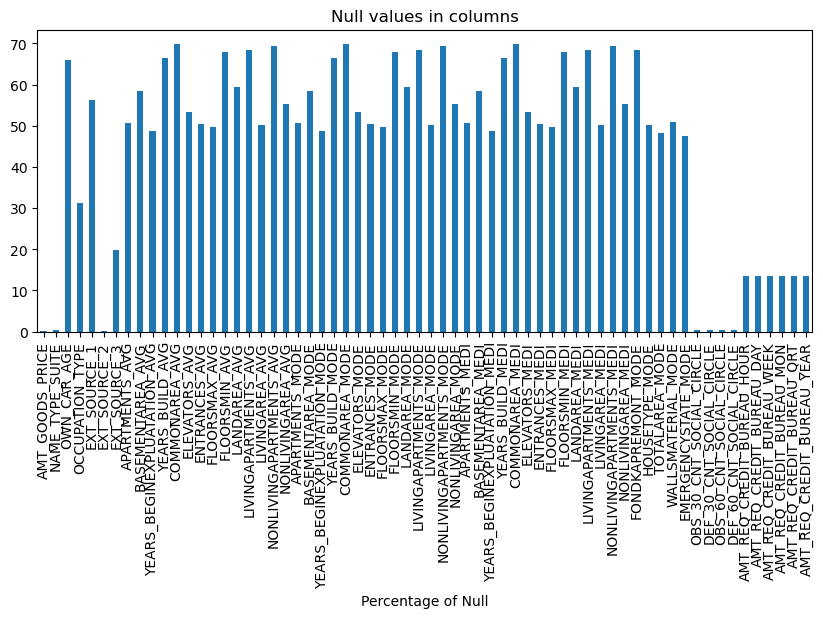

In [11]:
# Visualizing Null values of columns in graph

plt.figure(figsize = (10,4), dpi=100)
Na_col.plot(kind = "bar")
plt.title("Null values in columns")
plt.xlabel('Percentage of Null')
plt.show()

<h2 style = "color:Brown"> Remove columns with > 50% missing data</h2>

In [12]:
# Taking out columns with >50%

Na_col50 = Na_col[Na_col>50]
print("Number of columns with null value > 50% :", len(Na_col50.index))
print(Na_col50)

Number of columns with null value > 50% : 41
OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEA

In [13]:
appda.shape

(307511, 122)

In [14]:
appda.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
appda.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [16]:
# Columns with null values <15%

Na_col15 = Na_col[Na_col<15]
print("Number of columns with null value < 15% :", len(Na_col15.index))
print(Na_col15)

Number of columns with null value < 15% : 13
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


In [17]:
Na_col15.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [18]:
# Identifying unique values with columns <15%

appda[Na_col15.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  119831
AMT_GOODS_PRICE                 1002
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_HOUR         5
dtype: int64

From the above we can see that first two (EXT_SOURCE_2, AMT_GOODS_PRICE) are continous variables and remaining are catagorical variables

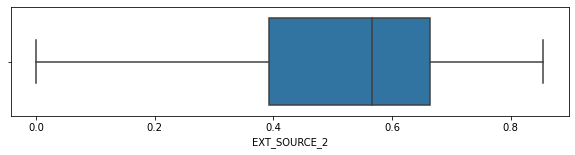

In [19]:
# Continous varibale

plt.figure(figsize=(10,2))
sns.boxplot(appda['EXT_SOURCE_2'])
plt.show()

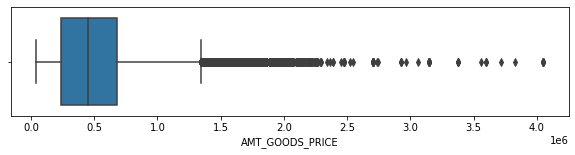

In [20]:
plt.figure(figsize=(10,2))
sns.boxplot(appda['AMT_GOODS_PRICE'])
plt.show()

Observation from Boxplots:

For 'EXT_SOURCE_2' no outliers present. So data is rightly present.
For 'AMT_GOODS_PRICE' outlier present in the data. so need to impute with median value: 4

In [21]:
for col in appda.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

## Now removing the columns from the data set which are unused for better analysis


In [23]:
col_unused = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

In [24]:
appda.drop(labels = col_unused, axis=1, inplace = True)

In [25]:
appda.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
appda.shape

(307511, 83)

In [27]:
# Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

appda.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<h2 style = "color:Brown"> XNA values are very low and Female is the majority. So lets replace XNA with gender 'F'</h2>

In [28]:
appda.loc[appda.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'

In [29]:
appda.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [31]:
# checking the CODE_GENDER 

appda.CODE_GENDER.head(10)

0    M
1    F
2    M
3    F
4    M
5    M
6    F
7    M
8    F
9    M
Name: CODE_GENDER, dtype: object

In [32]:
appda.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [33]:
# Casting variable into numeric in the dataset

numerical_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

appda[numerical_columns] = appda[numerical_columns].apply(pd.to_numeric)
appda.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'


In [35]:
# Age/Days columns are in -ve which needs to be converted to +ve value

appda.DAYS_BIRTH = appda.DAYS_BIRTH.abs()
appda.DAYS_EMPLOYED = appda.DAYS_EMPLOYED.abs()
appda.DAYS_REGISTRATION = appda.DAYS_REGISTRATION.abs()
appda.DAYS_ID_PUBLISH = appda.DAYS_ID_PUBLISH.abs()

In [36]:
appda.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
appda.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0.0,0.0,0.0,-787.0,0.0,0.0,0.0,2.0,0.0,1.0


In [39]:
# Checking outliers of numerical_column

appda[numerical_columns].describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,12.063419,0.040659,0.078173,0.230454,0.179555,-962.858788
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,3.265832,0.197499,0.268444,0.421124,0.383817,826.808487
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,0.010006,12413.000000,933.000000,2010.000000,1720.000000,10.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,12.000000,0.000000,0.000000,0.000000,0.000000,-757.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-274.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,23.000000,1.000000,1.000000,1.000000,1.000000,0.000000


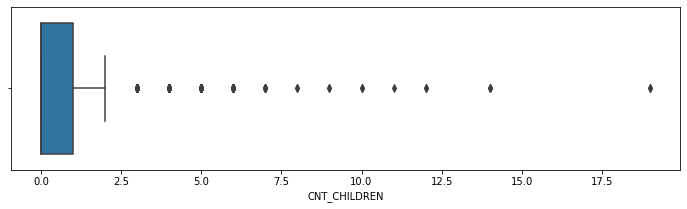

In [40]:
# Now lets check box plot for 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_REGISTRATION' 

plt.figure(figsize = (12,3))
sns.boxplot(appda['CNT_CHILDREN'])
plt.show()


1st quartile is missing for CNT_CHILDREN which means most of the data are present in the 1st quartile.

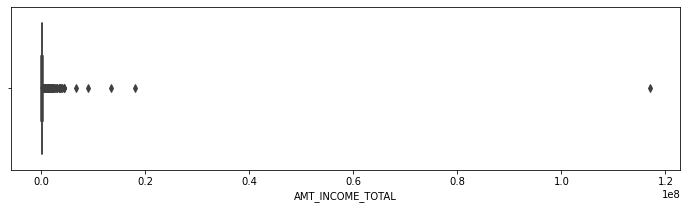

In [41]:
plt.figure(figsize = (12,3))
sns.boxplot(appda['AMT_INCOME_TOTAL'])
plt.show()

In AMT_INCOME_TOTAL only single high value data point is present as outlier


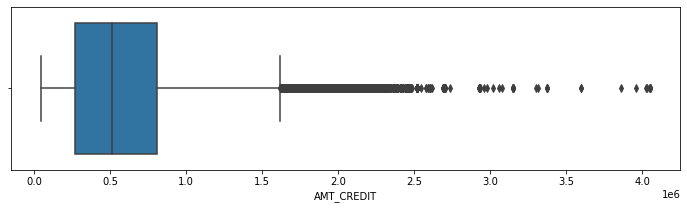

In [42]:
plt.figure(figsize = (12,3))
sns.boxplot(appda['AMT_CREDIT'])
plt.show()

AMT_CREDIT has little bit more outliers

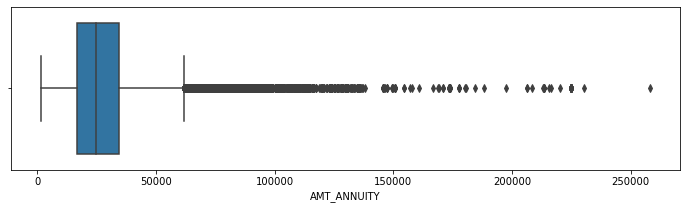

In [43]:
plt.figure(figsize = (12,3))
sns.boxplot(appda['AMT_ANNUITY'])
plt.show()

1st quartiles and 3rd quartile for AMT_ANNUITY is moved towards first quartile.


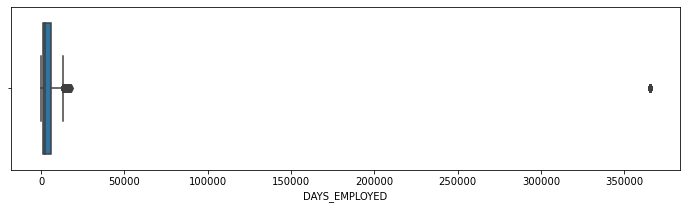

In [44]:
plt.figure(figsize = (12,3))
sns.boxplot(appda['DAYS_EMPLOYED'])
plt.show()


Same with this too 1st quartiles and 3rd quartile for DAYS_EMPLOYED is stays first quartile.


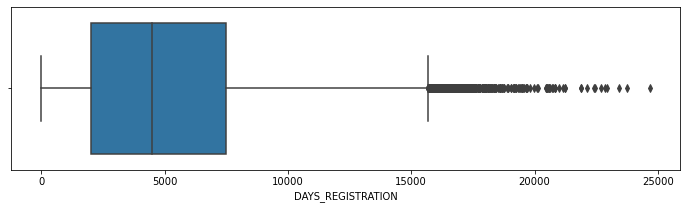

In [45]:
plt.figure(figsize = (12,3))
sns.boxplot(appda['DAYS_REGISTRATION'])
plt.show()

Same with this too 1st quartiles and 3rd quartile for DAYS_EMPLOYED is stays first quartile.
From above box plots we found that numeric columns have outliers

In [46]:
# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

appda['AMT_INCOME_RANGE'] = pd.cut(appda['AMT_INCOME_TOTAL'], bins = bins, labels=slots)

In [47]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

appda['AMT_CREDIT'] = pd.cut(appda['AMT_CREDIT'], bins = bins, labels=slots)

In [48]:
ins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

appda['AMT_GOODS_PRICE'] = pd.cut(appda['AMT_GOODS_PRICE'], bins = bins, labels=slots)


In [49]:
appda.AMT_GOODS_PRICE.head()

0       300000-400000
1    500000 and above
2       100000-200000
3       200000-300000
4    500000 and above
Name: AMT_GOODS_PRICE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [50]:
appda.AMT_CREDIT.head()

0       400000-500000
1    500000 and above
2       100000-200000
3       300000-400000
4    500000 and above
Name: AMT_CREDIT, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [51]:
appda.AMT_INCOME_RANGE.head()

0    200000-300000
1    200000-300000
2          <100000
3    100000-200000
4    100000-200000
Name: AMT_INCOME_RANGE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [52]:
appda.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,400000-500000,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000
1,100003,0,Cash loans,F,N,N,0,270000.0,500000 and above,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,100000-200000,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,<100000
3,100006,0,Cash loans,F,N,Y,0,135000.0,300000-400000,29686.5,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000
4,100007,0,Cash loans,M,N,Y,0,121500.0,500000 and above,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000


Analysis

In [53]:
# Dividing the dataset into two dataset of Target=1(client with payment difficulties) and Target=0(all other)


In [54]:
Target0 = appda.loc[appda.TARGET == 0]
Target1 = appda.loc[appda.TARGET == 1]

In [55]:
appda.TARGET.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [56]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

Imb = round(len(Target0)/len(Target1),2)

print('Imbalance Ratio:', Imb)

Imbalance Ratio: 11.39


In [57]:
appda.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 

## Univariate Analysis

In [59]:
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.rcParams["axes.labelsize"] = 9
plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.titlepad'] = 12

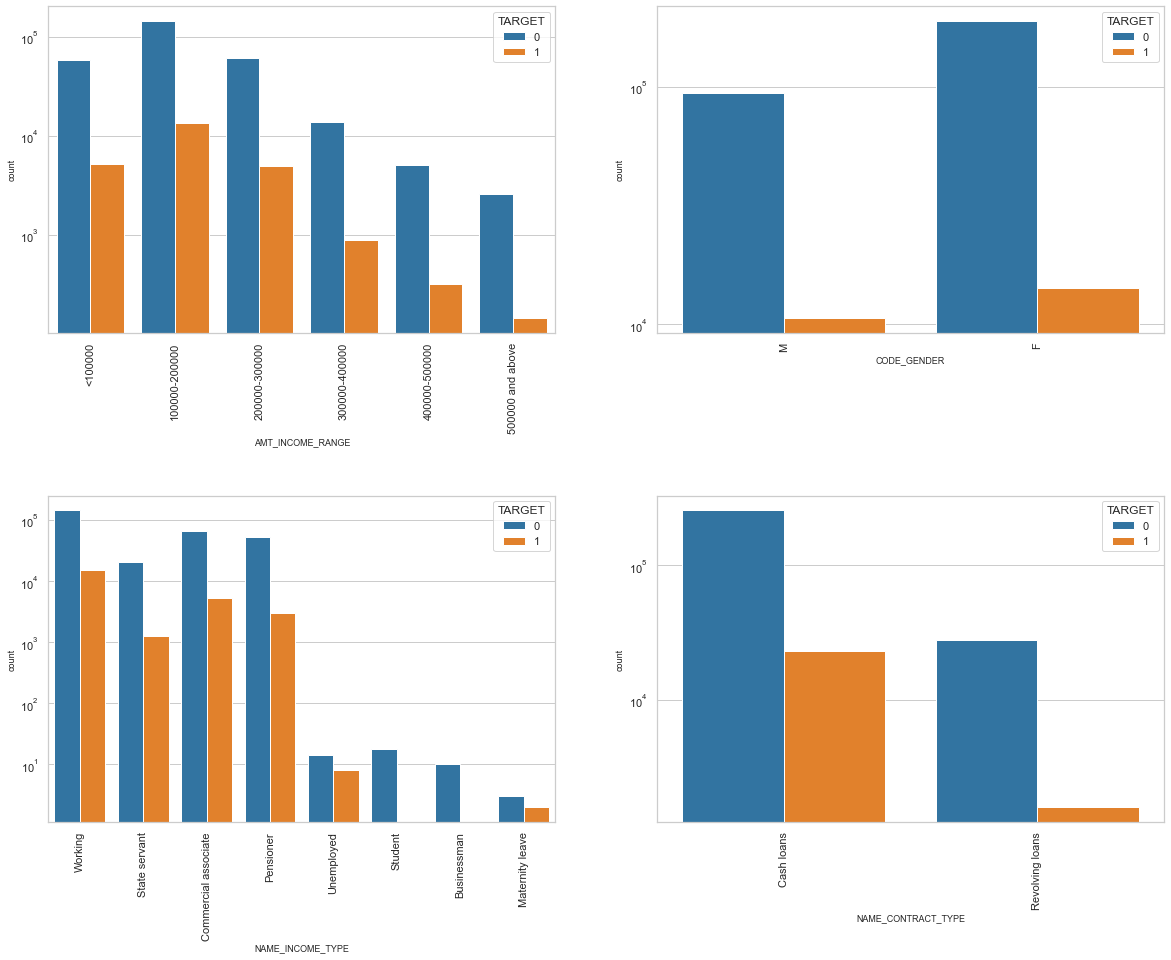

In [60]:
flow = ['AMT_INCOME_RANGE','CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(flow):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = appda)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

<h2 style = "color:Brown"> Reading Previous_application Dataset </h2> 

In [69]:
 # Reading the previous_application csv file

preapp = pd.read_csv('previous_application.csv')
preapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Number of rows and columns in previous application data frame

preapp.shape


(1670214, 37)

In [72]:
# Knowing the previous application data frame info

preapp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [73]:
# describing the previous application data frame

preapp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [74]:
# Finding out null values

Nu_col = null_percentage(preapp)
Nu_col.head()

SK_ID_PREV             0.00
SK_ID_CURR             0.00
NAME_CONTRACT_TYPE     0.00
AMT_ANNUITY           22.29
AMT_APPLICATION        0.00
dtype: float64

In [75]:
# Removing null values >0

Nu_col0 = Nu_col[Nu_col>0]
Nu_col0

AMT_ANNUITY                  22.29
AMT_DOWN_PAYMENT             53.64
AMT_GOODS_PRICE              23.08
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [76]:
# Now removing null values <50

Nu_col50 = Nu_col[Nu_col<50]
Nu_col50

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [77]:
# Merging both the dataframes (application_data, previous_application)

da_combi = pd.merge(left = appda, right = preapp, how='inner', on ='SK_ID_CURR', suffixes ='_x')
da_combi.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,400000-500000,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,500000 and above,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,500000 and above,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,500000 and above,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,100000-200000,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [78]:
da_combi.shape

(1413701, 120)

In [79]:
da_combi.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=120)

In [80]:
da_combi.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 120 columns):
 #    Column                       Dtype   
---   ------                       -----   
 0    SK_ID_CURR                   int64   
 1    TARGET                       int64   
 2    NAME_CONTRACT_TYPE_          object  
 3    CODE_GENDER                  object  
 4    FLAG_OWN_CAR                 object  
 5    FLAG_OWN_REALTY              object  
 6    CNT_CHILDREN                 int64   
 7    AMT_INCOME_TOTAL             float64 
 8    AMT_CREDIT_                  category
 9    AMT_ANNUITY_                 float64 
 10   AMT_GOODS_PRICE_             category
 11   NAME_TYPE_SUITE_             object  
 12   NAME_INCOME_TYPE             object  
 13   NAME_EDUCATION_TYPE          object  
 14   NAME_FAMILY_STATUS           object  
 15   NAME_HOUSING_TYPE            object  
 16   REGION_POPULATION_RELATIVE   float64 
 17   DAYS_BIRTH                   int64   
 18   

In [81]:
# Performing univarite analysis

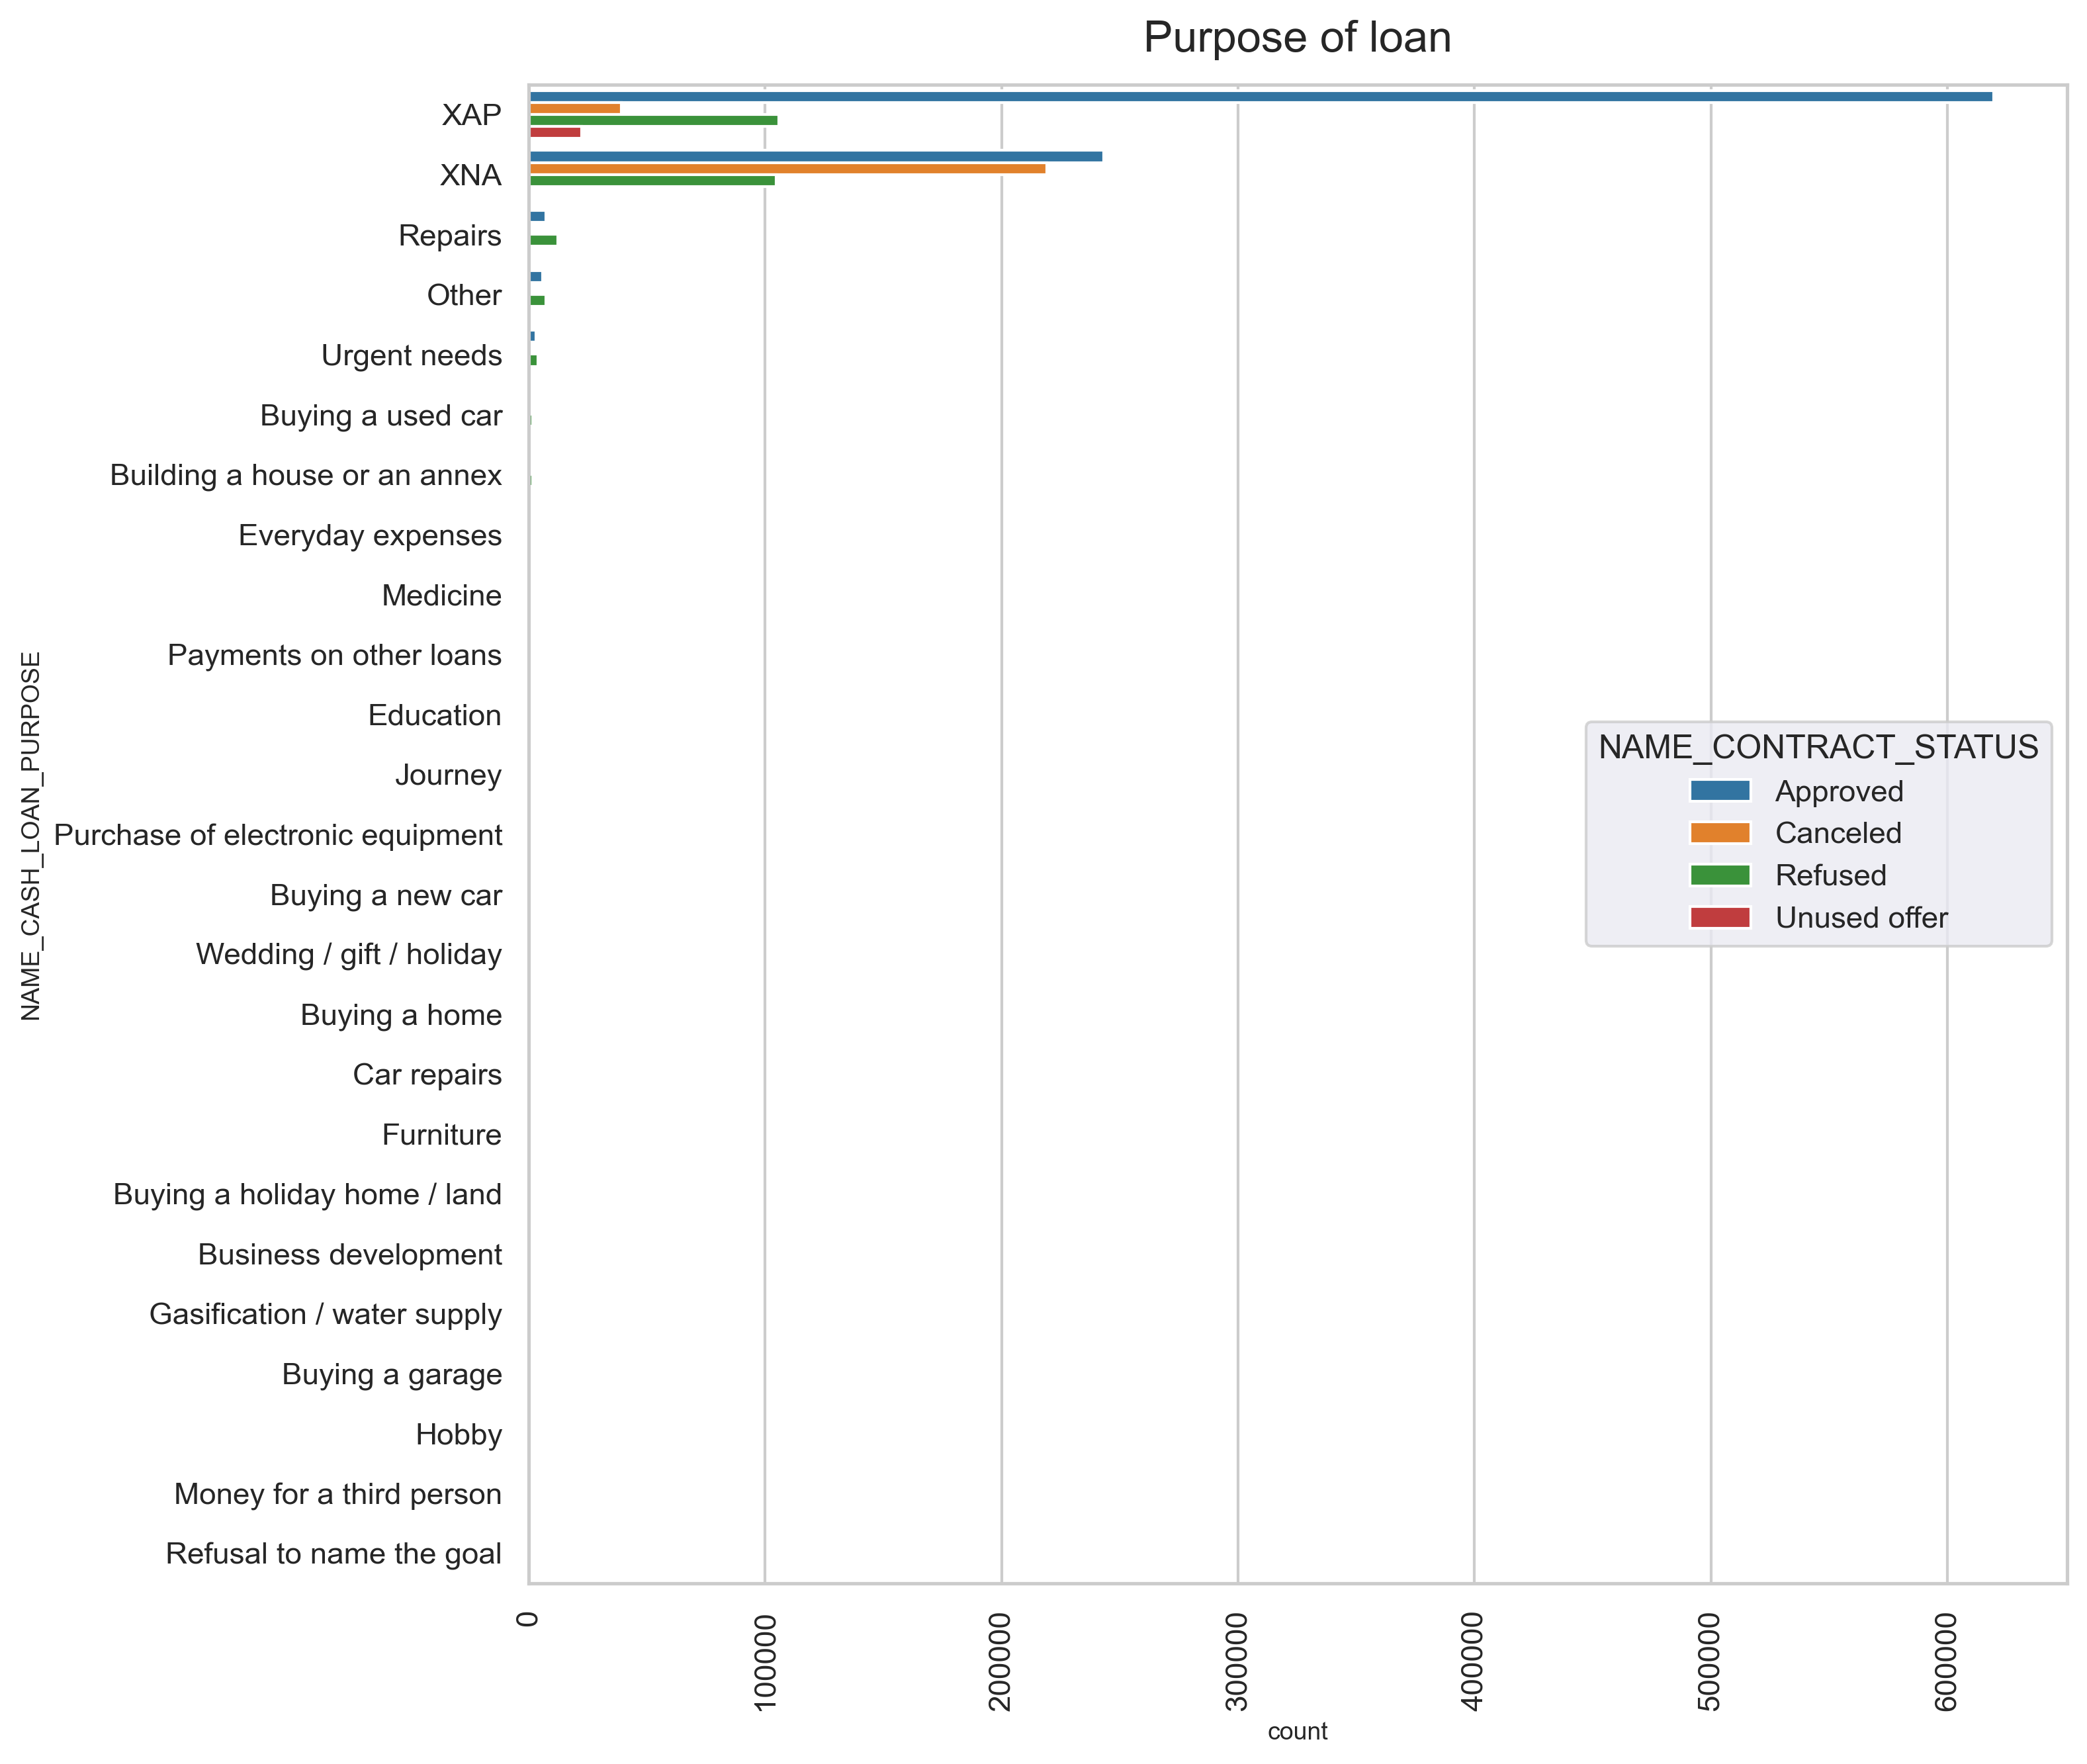

In [82]:
# Purpose of loan


plt.figure(figsize=(10,10),dpi = 300)
plt.xticks(rotation=90)
plt.title('Purpose of loan')
sns.set_style('darkgrid')
ax = sns.countplot(data = da_combi, y= 'NAME_CASH_LOAN_PURPOSE', order=da_combi['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 
plt.show()

Observation
- Most of loan rejection was from 'repairs'

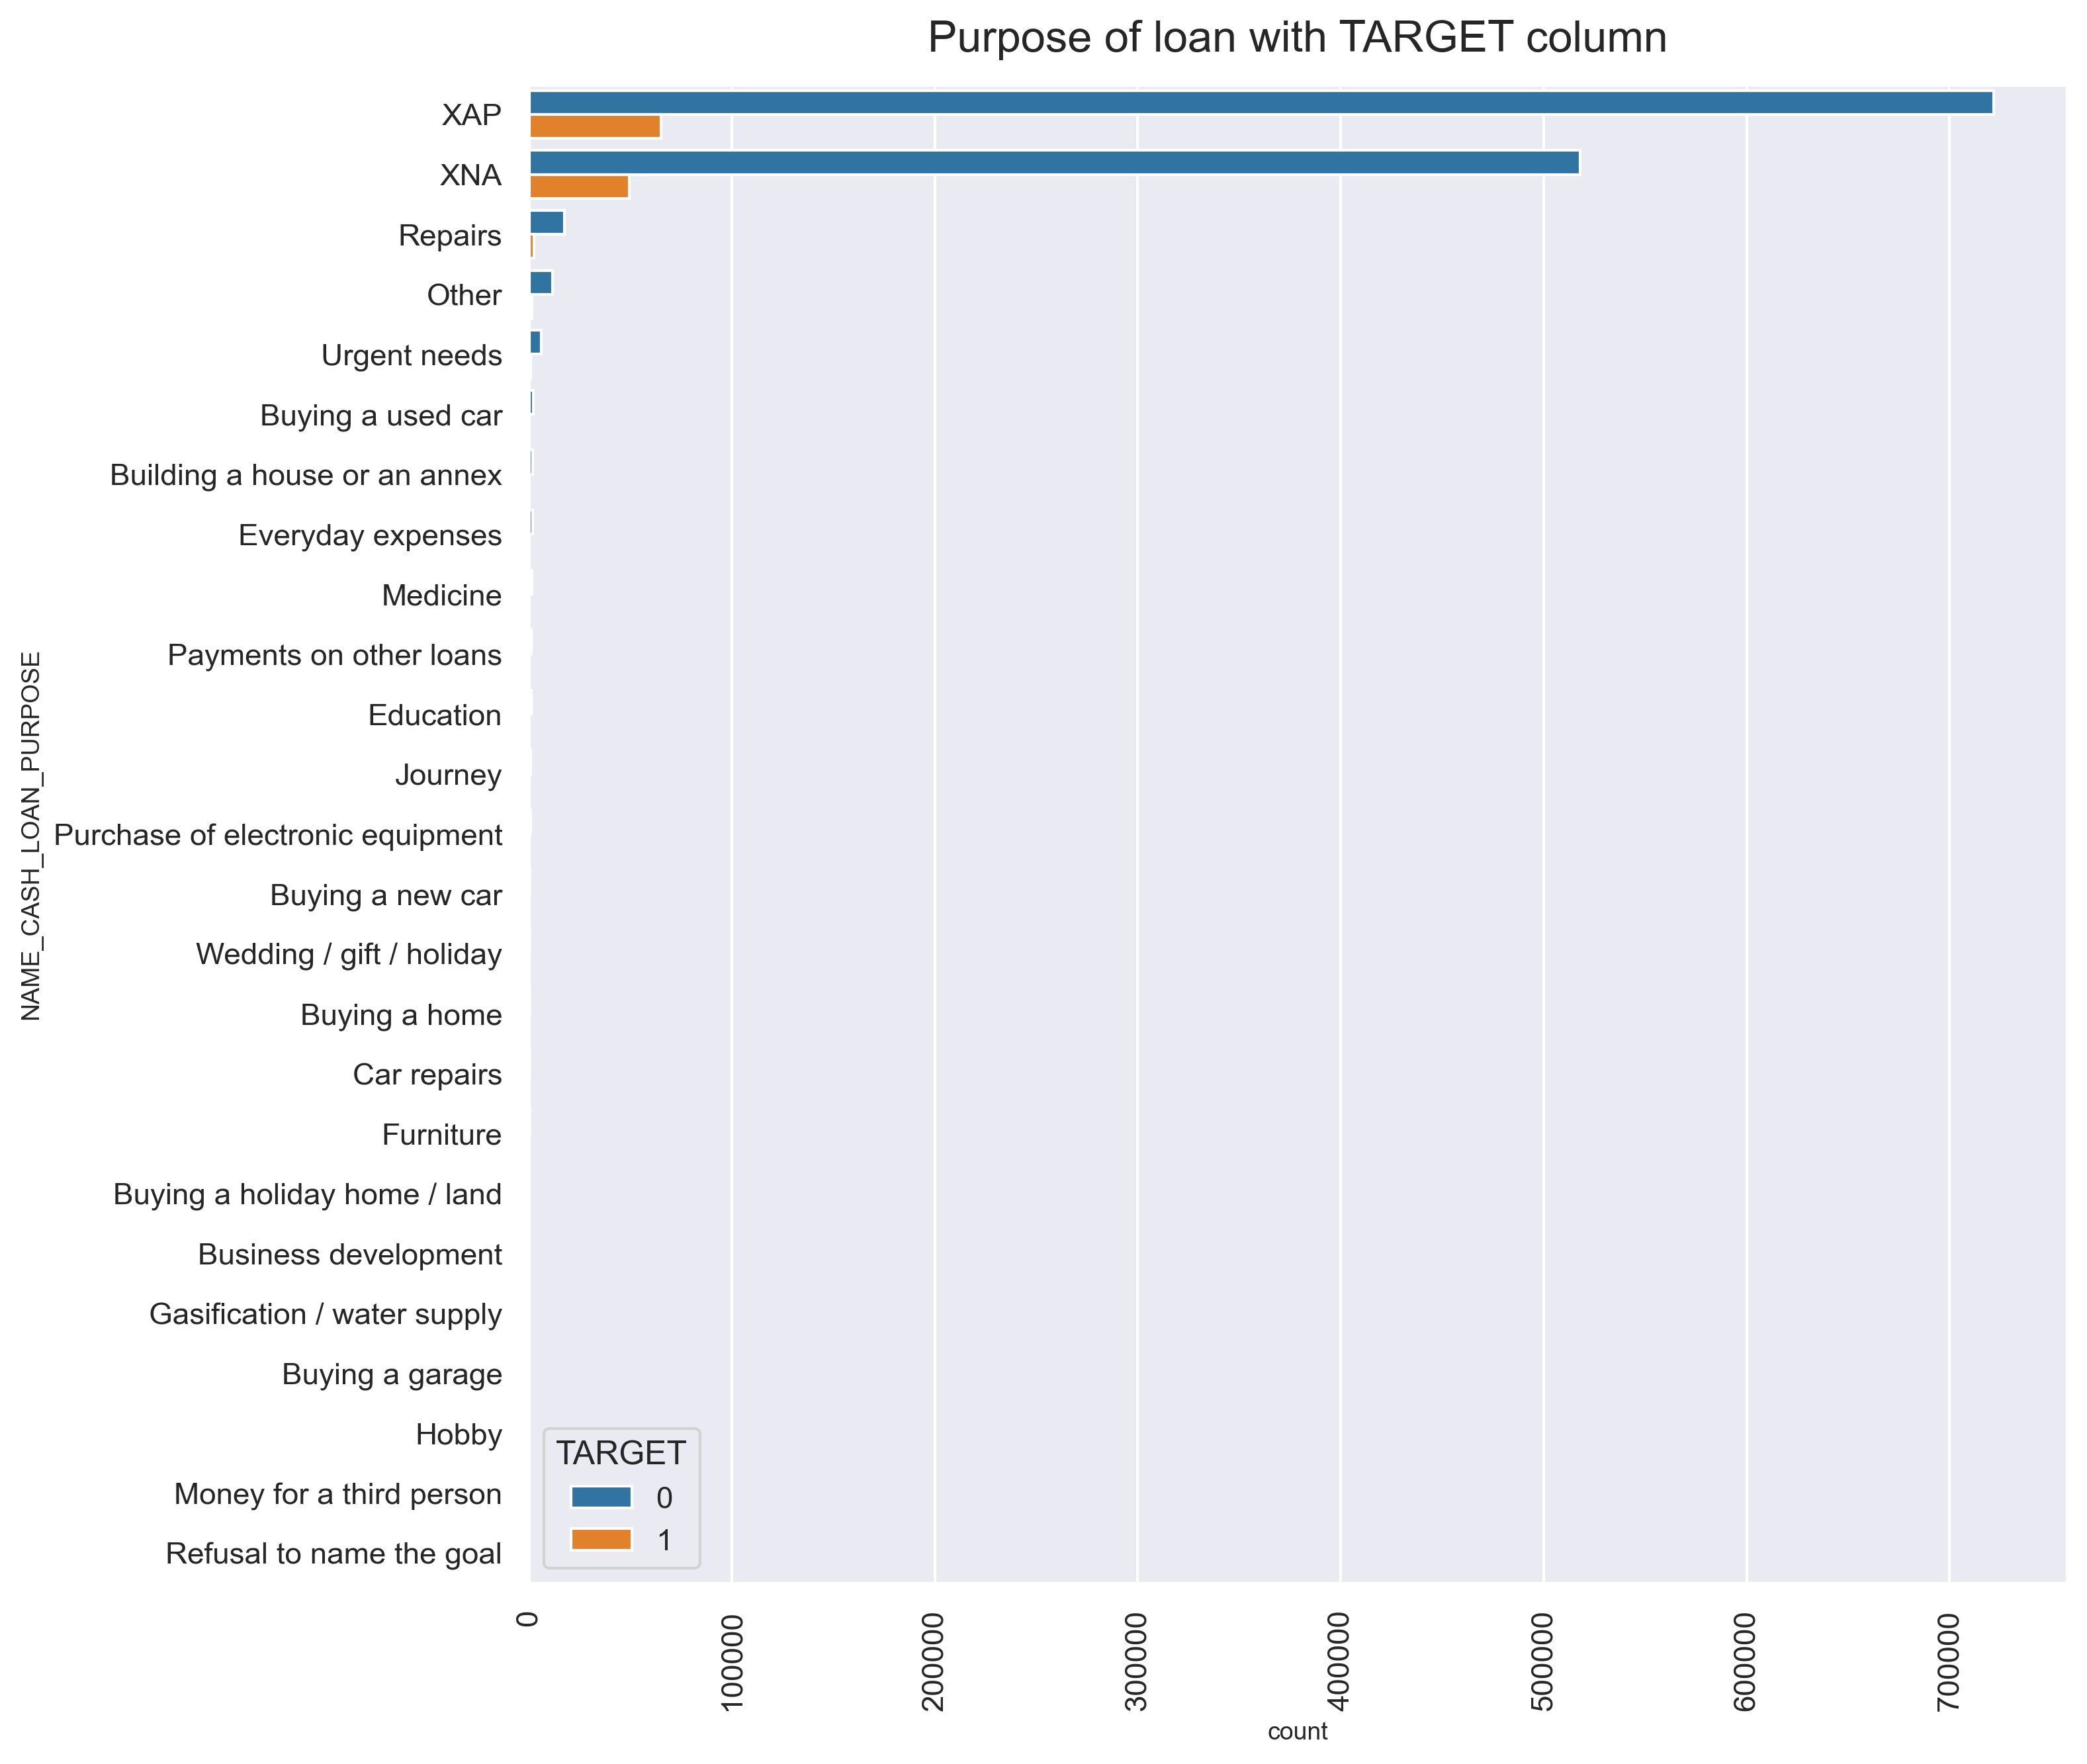

In [83]:
# Purpose of loan with TARGET column

plt.figure(figsize=(10,10),dpi = 300)
plt.xticks(rotation=90)
plt.title('Purpose of loan with TARGET column')
sns.set_style('darkgrid')
ax = sns.countplot(data = da_combi, y= 'NAME_CASH_LOAN_PURPOSE', order=da_combi['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 
plt.show()


<h2 style = "color:Blue"> Data Cleaning Completed </h2>

<h2 style = "color:Brown"> Data Analysis </h2>


# Observation
- Most of loan rejection was from 'repairs'

In [108]:
#Some columns have negative values which do not make sense as per their context, 
#therfore converting their values to absolute values:

appda['DAYS_BIRTH'] = abs(appda['DAYS_BIRTH'])
appda['DAYS_ID_PUBLISH'] = abs(appda['DAYS_ID_PUBLISH'])
appda['DAYS_ID_PUBLISH'] = abs(appda['DAYS_ID_PUBLISH'])


In [109]:
appda.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Creating bins for income amount (AMT_INCOME_TOTAL)

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
appda ['AMT_INCOME_RANGE'] = pd.cut(appda['AMT_INCOME_TOTAL'], bins=bins, labels=slot)

In [113]:
appda["AMT_INCOME_RANGE"].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [114]:
#Creating bins for Credit amount (AMT_CREDIT)

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

appda['AMT_CREDIT_RANGE'] = pd.cut(appda['AMT_CREDIT'], bins=bins, labels=slots)

In [115]:
appda["AMT_CREDIT_RANGE"].head()

0       400000-450000
1    900000 and above
2            0-150000
3       300000-350000
4       500000-550000
Name: AMT_CREDIT_RANGE, dtype: category
Categories (17, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000 and above']

In [116]:
#Dividing the dataset into two datasets of  target=1 (client with payment difficulties) and target=0 (all other cases)
#We will be using these two datasets for few comparisons
target0 = appda[appda["TARGET"]==0]
target1 = appda[appda["TARGET"]==1]

In [117]:
print(target0.shape)
print(target1.shape)

(282686, 124)
(24825, 124)


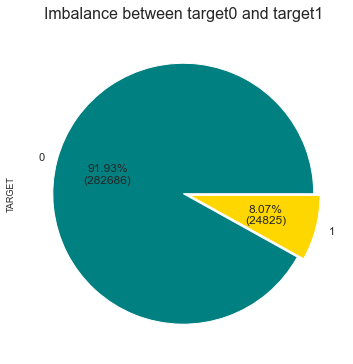

In [118]:
#Calculating Imbalance percentage for target 0 and target 1. 
#Visualizing the above result in a pie plot

total = len(appda["TARGET"])
explode = [0, 0.05]

def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100) #to print both the percentage and value together

plt.figure(figsize = [6, 6])
plt.title("Imbalance between target0 and target1")
appda["TARGET"].value_counts().plot.pie(autopct = my_fmt, colors = ["teal", "gold"], explode = explode)

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

8.78% of clients are clients with payment difficulties. 91.21% of clients fall under the 'all other cases' category.

## Plotting graphs for Target0 (Customers with no payment difficulties)

In [119]:
# Count plotting in logarithmic scale

#creating a function for plotting (to reduce repetitive code)
def functionPlot(df, col, title, xtitle, ytitle, hue = None):
    
    sns.set_style("white")
    sns.set_context("notebook")    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)

    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue, palette='deep') 
    ax.set(xlabel = xtitle, ylabel = ytitle)    
    plt.show()

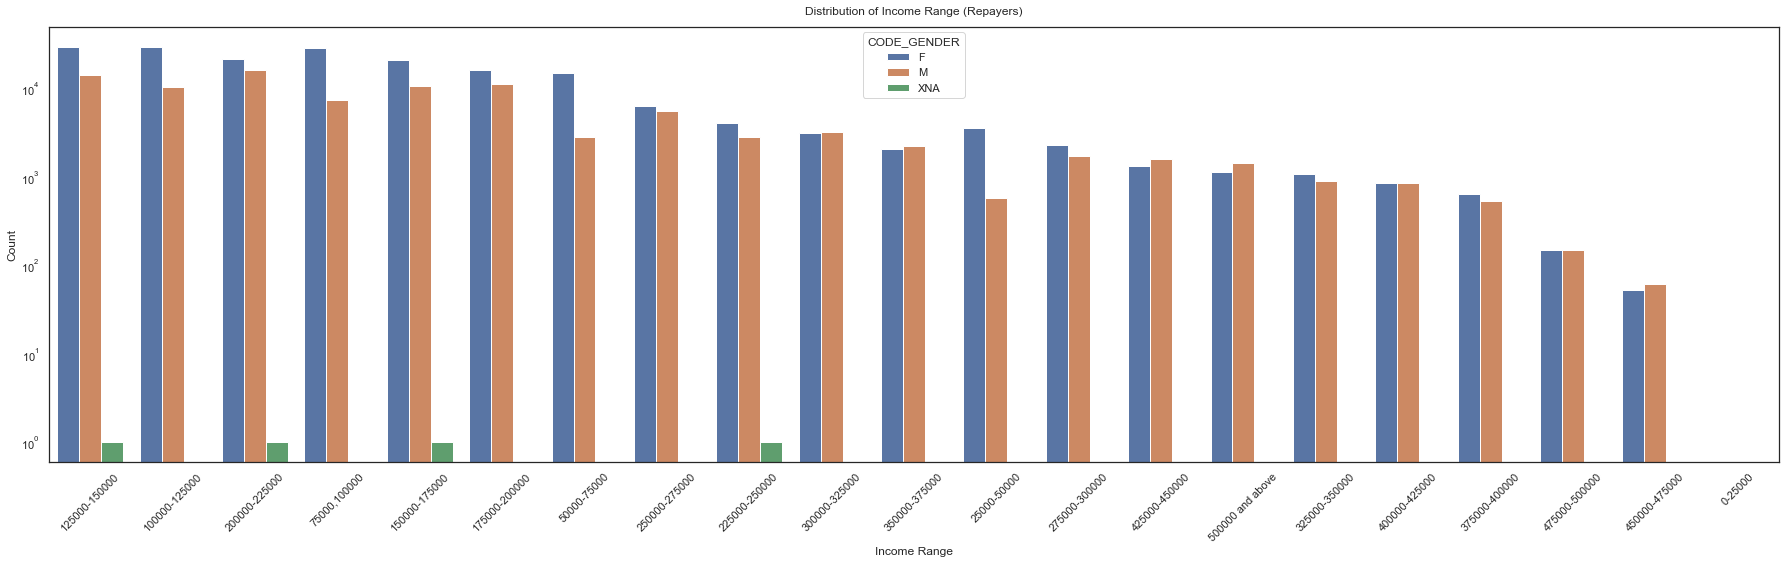

In [121]:
# PLotting for income range (AMT_INCOME_RANGE) (Segregated based on gender)

functionPlot(target0, col='AMT_INCOME_RANGE', title='Distribution of Income Range (Repayers)', hue='CODE_GENDER', xtitle = "Income Range", ytitle = "Count")

<h1 style = "color:Pink"> Inferences </h1>

1. In majority of the cases, female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. In the slots 250000-275000 and 375000-400000, the count for both males and females are almost the same

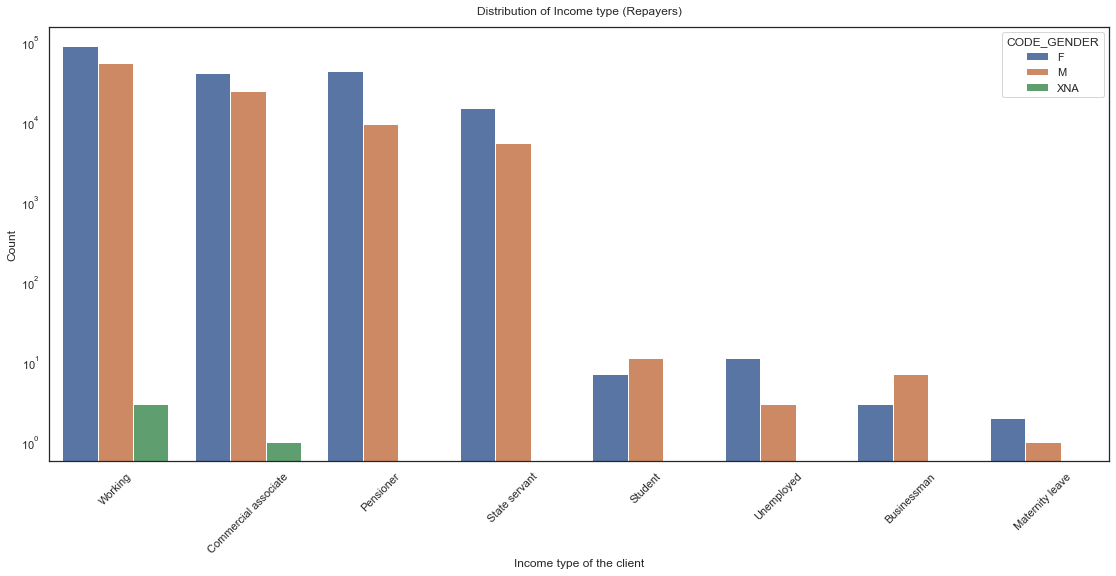

In [122]:
# Plotting for Income type (NAME_INCOME_TYPE) (Segregated based on gender)

functionPlot(target0, col='NAME_INCOME_TYPE', title='Distribution of Income type (Repayers)', hue='CODE_GENDER', xtitle = "Income type of the client", ytitle = "Count")

<h1 style = "color:Pink"> Inferences </h1>
1. Working people make up most of the clients.
2. Gender distribution amongst students is almost the same.
3. There is a stark decerease in the amount of clients if they are not working, commerical associate or state servants.
4. There are more female clients in the top 3 categories of income type.

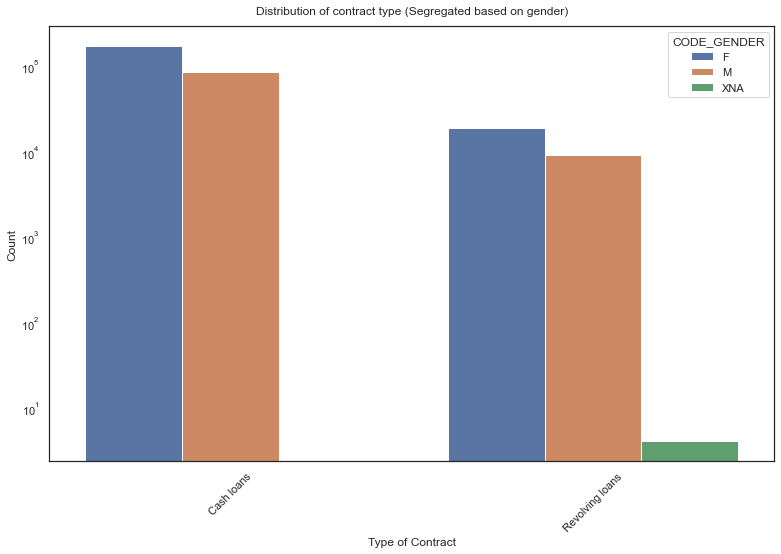

In [124]:
# Plotting for Contract type (NAME_CONTRACT_TYPE) (Segregated based on gender)

functionPlot(target0, col='NAME_CONTRACT_TYPE', title='Distribution of contract type (Segregated based on gender)', hue='CODE_GENDER', xtitle = "Type of Contract", ytitle = "Count")

<h1 style = "color:Pink"> Inferences </h1>

Cash loans clearly has more clients per credit compared to revolving loans. In both cases, there are female clients than male clients.

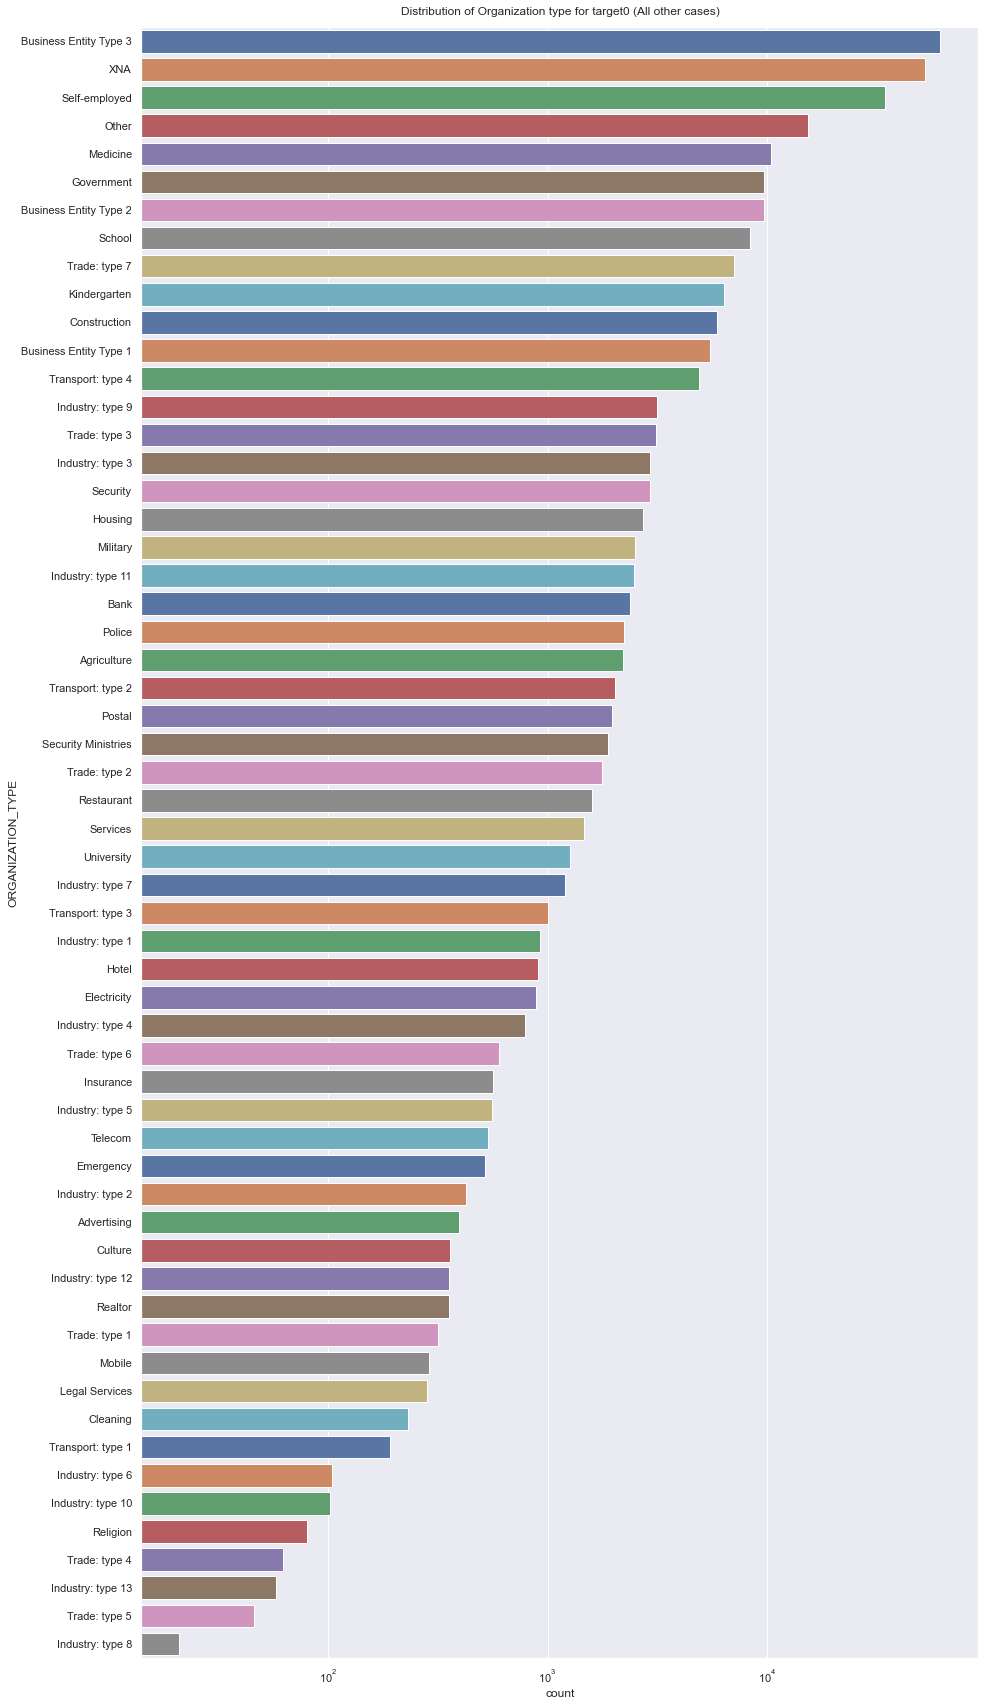

In [125]:
# Plotting for Organization type in logarithmic scale 

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize = [15,30])

plt.title("Distribution of Organization type for target0 (All other cases)")
plt.xscale('log')

sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index, palette='deep')

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’, ‘Government’ and 'Business entity type2'.
2. Fewer clients are from Industries type 8, type 5, Industry: type 13, Trade: type4, Religion, Industry type 6 and type 10.

## Plotting graphs for Target1 (Customers with payment difficulties)

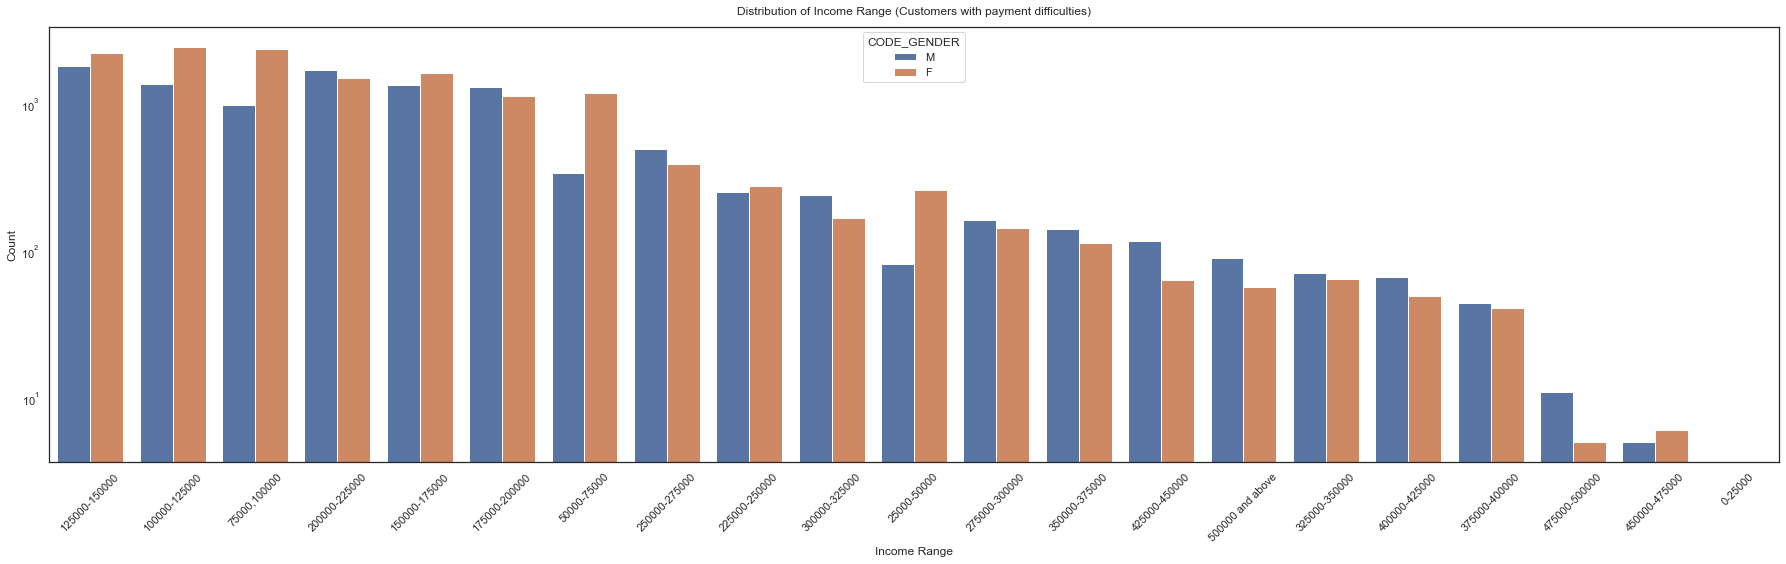

In [127]:
# PLotting for income range (Segregated based on gender)

functionPlot(target1, col='AMT_INCOME_RANGE', title='Distribution of Income Range (Customers with payment difficulties)', hue='CODE_GENDER', xtitle = "Income Range", ytitle = "Count")

<h1 style = "color:Pink"> Inferences </h1>

1. Income range from 100000 to 200000 is having the highest number of credits.
2. Very less count for income range 400000 and above.
3. On average, there are more number of male clients where the number of credits are less.

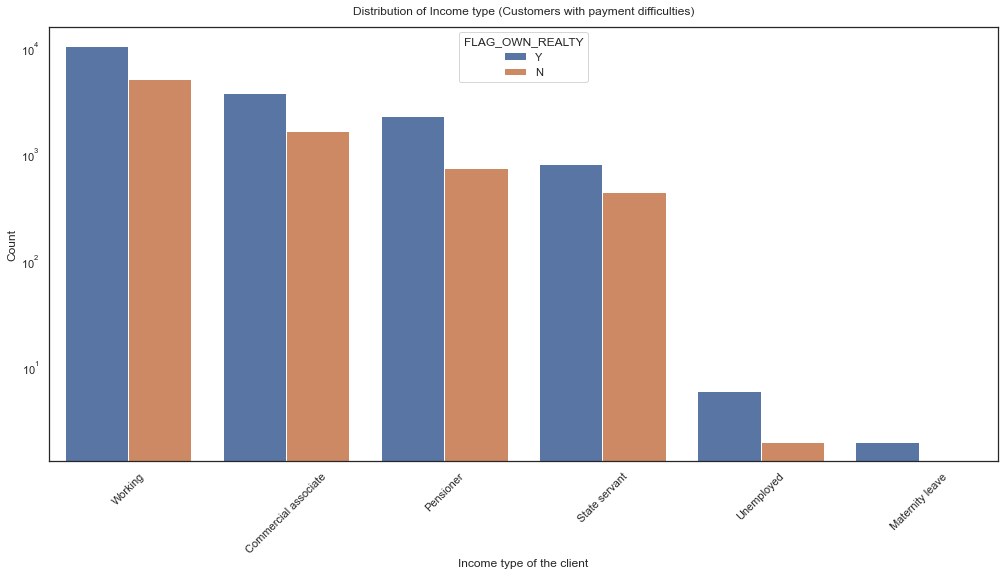

In [129]:
# Plotting for Income type (Segregated based on house ownership)

functionPlot(target1, col='NAME_INCOME_TYPE', title='Distribution of Income type (Customers with payment difficulties)', hue='FLAG_OWN_REALTY', xtitle = "Income type of the client", ytitle = "Count")

<h1 style = "color:Pink"> Inferences </h1>

1. Working customers, obviously, have a higher count.
2. As we can see, most customers do have their own property (house or a flat) but a large number of customers can be stated as otherwise.

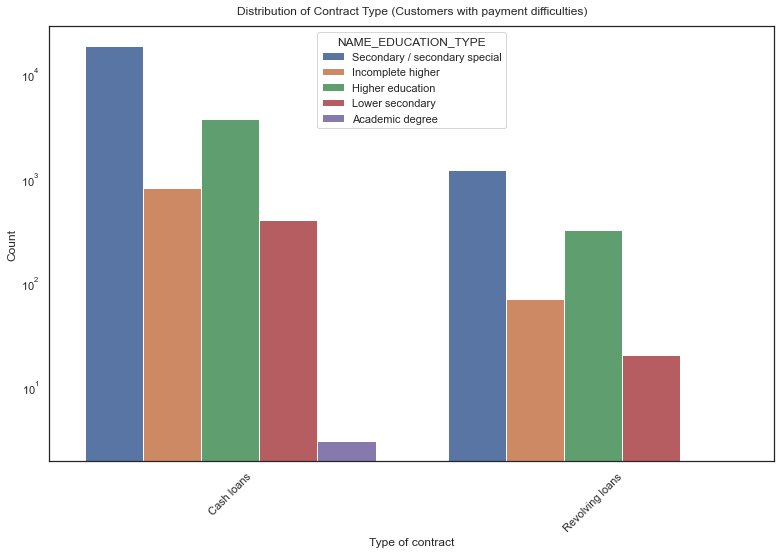

In [130]:
# Plotting for Contract type (Segregated based on education level)

functionPlot(target1, col='NAME_CONTRACT_TYPE', title='Distribution of Contract Type (Customers with payment difficulties)', hue='NAME_EDUCATION_TYPE', xtitle = "Type of contract", ytitle = "Count")

<h1 style = "color:Pink"> Inferences </h1>

1. Cash loans, as we can see, are preferred by clients of all education backgrounds with an overwhelming majority.
2. People with only an academic degree do not prefer revolving loans at all.

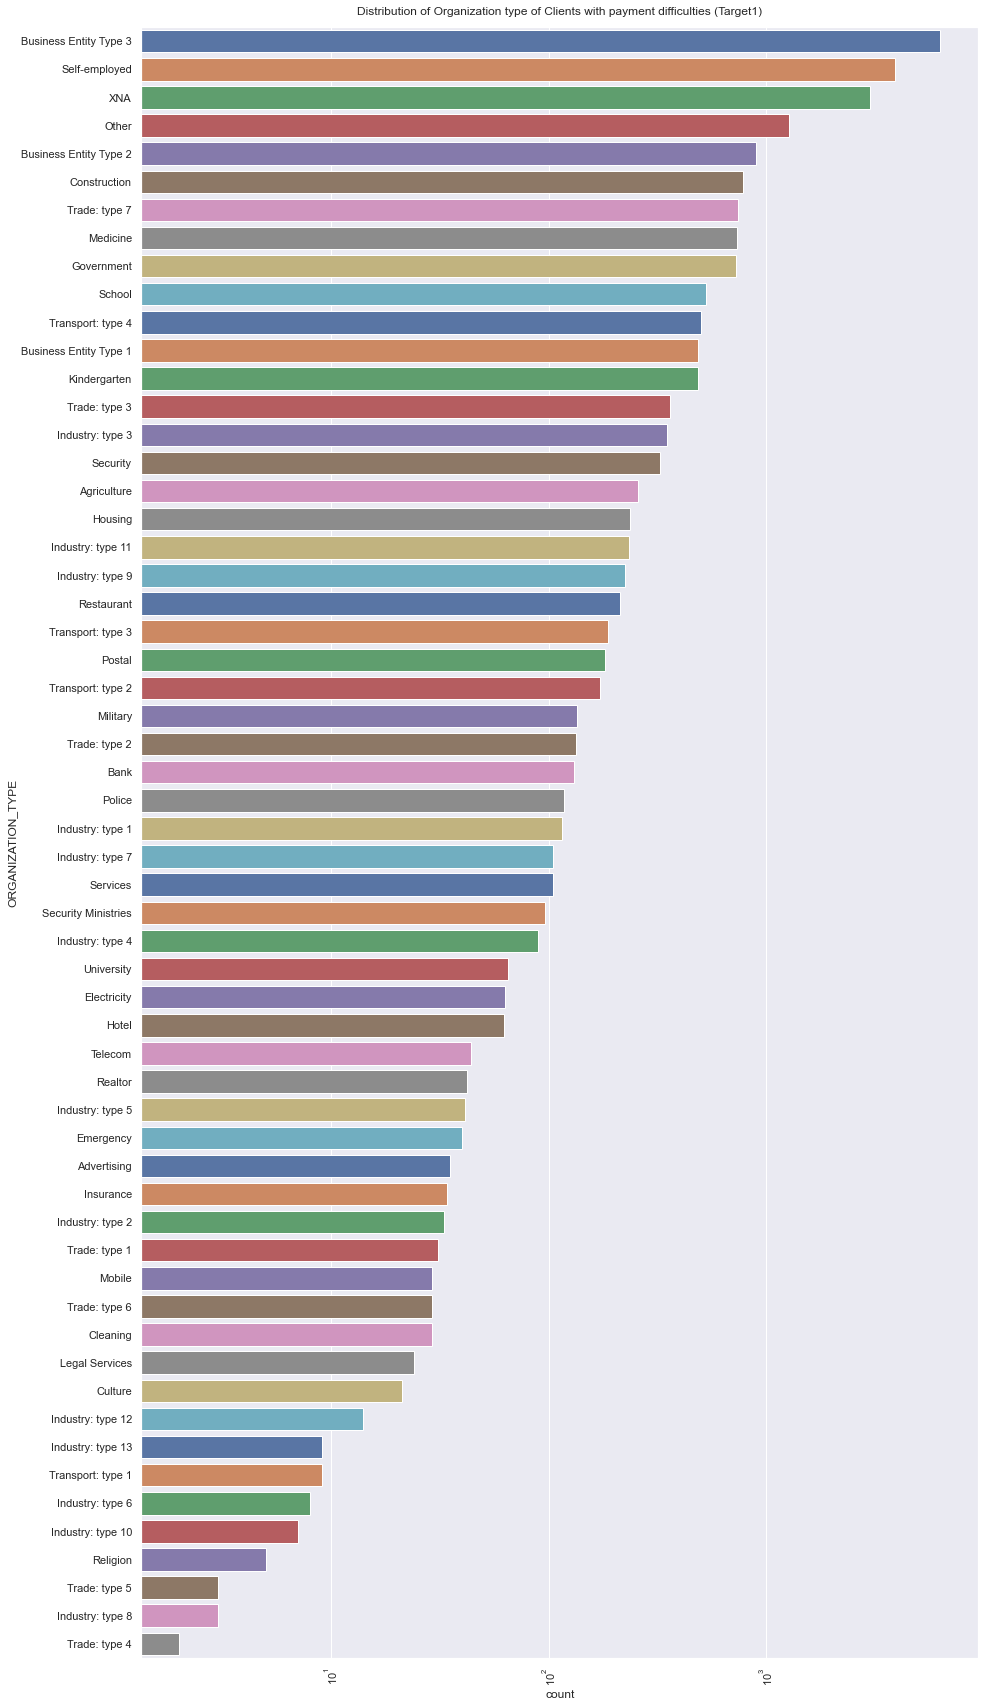

In [131]:
# Plotting for Organization type

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))

plt.title("Distribution of Organization type of Clients with payment difficulties (Target1)")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data = target1, y = 'ORGANIZATION_TYPE', order = target1['ORGANIZATION_TYPE'].value_counts().index, palette='deep')

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

1. As compared to the clients with NO payment difficulties, clients WITH payment difficulties have the 'construction' business type in the top 5 count replacing the 'medicine' business type.

2. Most of the business types are the same as clients with NO payment difficulties, except we have the business type 'Transport: type1' in the case of clients WITH payment difficulties which wasn't present before.

# More Analysis to find patterns:

In [132]:
#Separting the categorical columns from the numerical ones
obj_dtypes = [i for i in appda.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in appda.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [133]:
#Print categorical columns
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [134]:
#Print numerical columns
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
N

### Distribution of Target variable¶
Target variable:

1 - client with payment difficulties

0 - all other cases

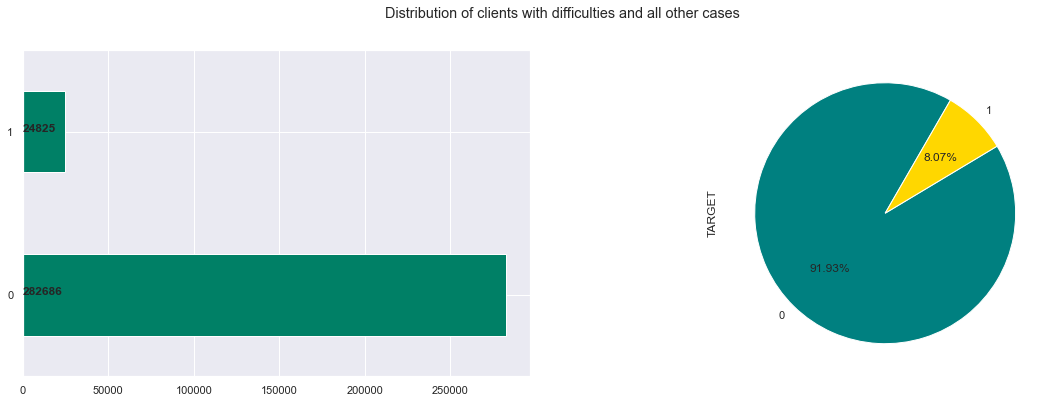

In [135]:
plt.figure(figsize = [20, 6])

plt.suptitle("Distribution of clients with difficulties and all other cases")

plt.subplot(1,2,1)
ax = appda["TARGET"].value_counts().plot(kind = "barh", colormap = "summer")

plt.subplot(1,2,2)
appda["TARGET"].value_counts().plot.pie(autopct = "%.2f%%", startangle = 60, colors = ["teal", "gold"])


for i,j in enumerate(appda["TARGET"].value_counts().values):
    ax.text(.7, i, j, weight = "bold")

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

8.79% (18547) out of total client population (192573) have difficulties in repaying loans.

## Concatenating applicationData and previousApplication

In [136]:
## Concatenating applicationData and previousApplication
#Joining the two data sets by a common column (SK_ID_CURR) for further comparison and analysis

data = pd.merge(appda, preapp, on = 'SK_ID_CURR', how = 'inner')
data.sort_values(by = ['SK_ID_CURR','SK_ID_PREV'], ascending = [True, True], inplace = True)

In [137]:
data.head(10) #THE COMBINED DATASET

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN
10,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
13,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0


## Distribution in Contract types in data (Combined dataset)

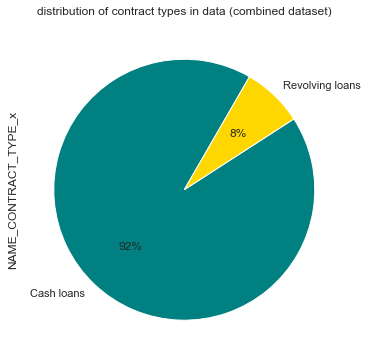

In [138]:
#Distribution of Contract type
plt.figure(figsize = [14, 6])
plt.subplot(1,2,1)
plt.title("distribution of contract types in data (combined dataset)")
data["NAME_CONTRACT_TYPE_x"].value_counts().plot.pie(autopct = "%1.0f%%", startangle = 60, colors = ["teal", "gold"])

plt.show()

<h1 style = "color:Pink"> Inferences </h1>
The percentage of revolving loans and cash loans are 8% & 92%.

### Point to infer from the graph
In the applicationData file, we saw females had 61% and males had 39% but now in the combined dataset we see:-
Females: 62%
Males: 38%

### Distribution of Contract type by target (repayment status)

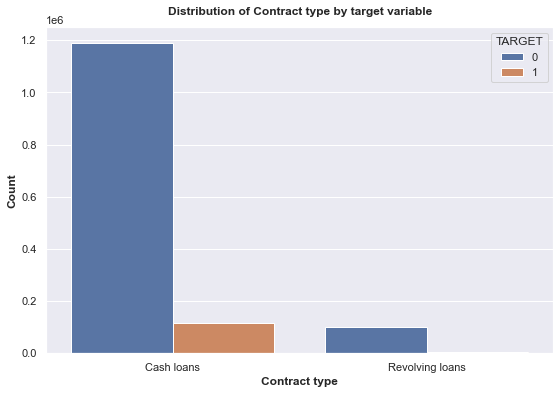

In [141]:
fig = plt.figure(figsize = [20, 6])

plt.subplot(1,2,1)
plt.title("Distribution of Contract type by target variable", weight = "bold")

sns.countplot("NAME_CONTRACT_TYPE_x", hue = "TARGET", data = data, palette="deep")
plt.xlabel("Contract type", weight = "bold")
plt.ylabel("Count", weight = "bold")
plt.show()

<h1 style = "color:Pink"> Inferences </h1>

Both set of clients (Target 0 and target 1) prefer cash loans over revolving loans with overwhelming numbers

## Distribution of Gender by target (repayment status)

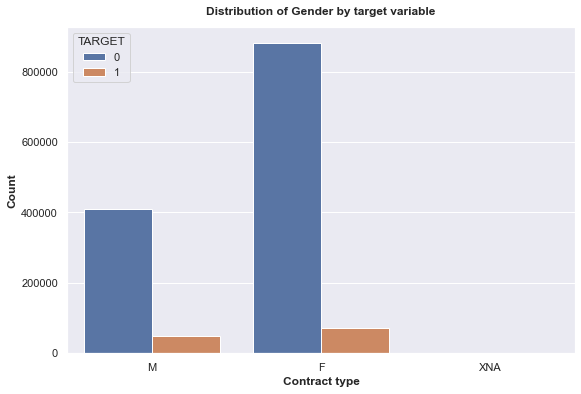

In [143]:
fig = plt.figure(figsize = [20, 6])

plt.subplot(1,2,1)
plt.title("Distribution of Gender by target variable", weight = "bold")

sns.countplot("CODE_GENDER", hue = "TARGET", data = data, palette="deep")
plt.xlabel("Contract type", weight = "bold")
plt.ylabel("Count", weight = "bold")
plt.show()

<h1 style = "color:Pink"> Inferences </h1>

1. Clearly, female clients are the best repayers of their loan (almost double the amount of males).
2. Amount of defaulters in both genders are almost equally distributed.

### Distribution of client owning a car and by target.

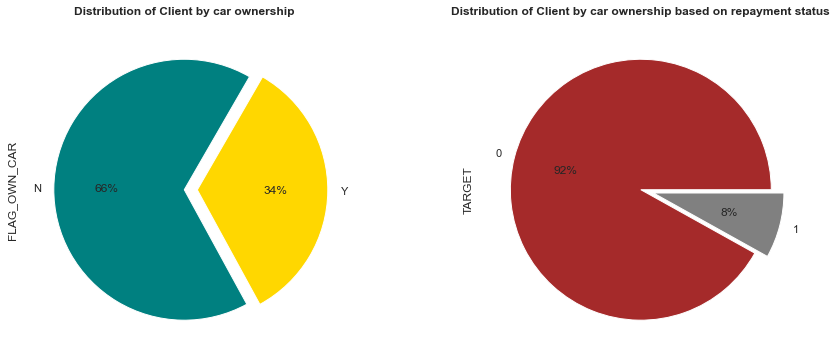

In [144]:
fig = plt.figure(figsize = [15,6])
explode = (0, 0.1)

plt.subplot(1,2,1)
plt.title("Distribution of Client by car ownership", weight = "bold")
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%", colors=["teal", "gold"], explode = explode, startangle = 60)

plt.subplot(1,2,2)
plt.title("Distribution of Client by car ownership based on repayment status", weight = "bold")
data[data["FLAG_OWN_CAR"] == "Y"]["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%", colors=["brown","grey"], explode = explode)

plt.show()

<h1 style = "color:Pink"> Inferences </h1>
1st pie plot : Only 38% of clients own a car .

2nd pie plot : Only 8% of clients who own a car have difficulty in payments 

### Distribution of client owning a house or flat and by target¶

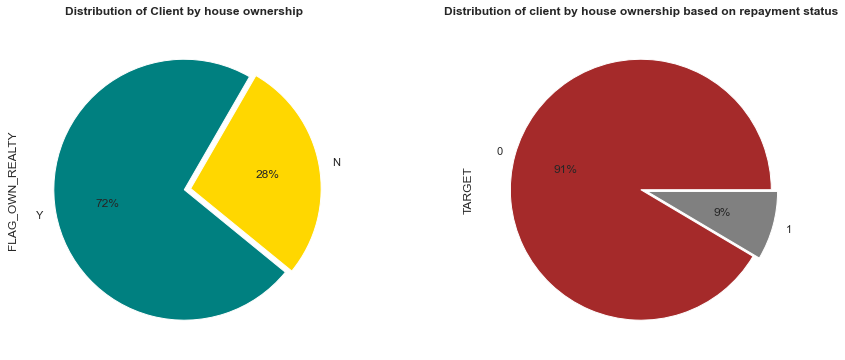

In [146]:
#FLAG_OWN_REALTY - Flag if client owns a house or flat
fig = plt.figure(figsize = [15,6])
explode = [0, 0.05]

plt.subplot(1,2,1)
plt.title("Distribution of Client by house ownership", weight = "bold")
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%", colors = ["teal","gold"], startangle = 60, explode = explode)


plt.subplot(1,2,2)
plt.title("Distribution of client by house ownership based on repayment status", weight = "bold")
data[data["FLAG_OWN_REALTY"] == "Y"]["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%", colors = ["brown","grey"], explode = explode)

plt.show()

<h1 style = "color:Pink"> Inferences </h1>
SUBPLOT 1 : 71% of clients own a house or a flat.

SUBPLOT 2 : Out of all the clients who own a house, 9% of clients have difficulty in making payments.

### Distribution of Number of children and family members of client by repayment status (Based on target).

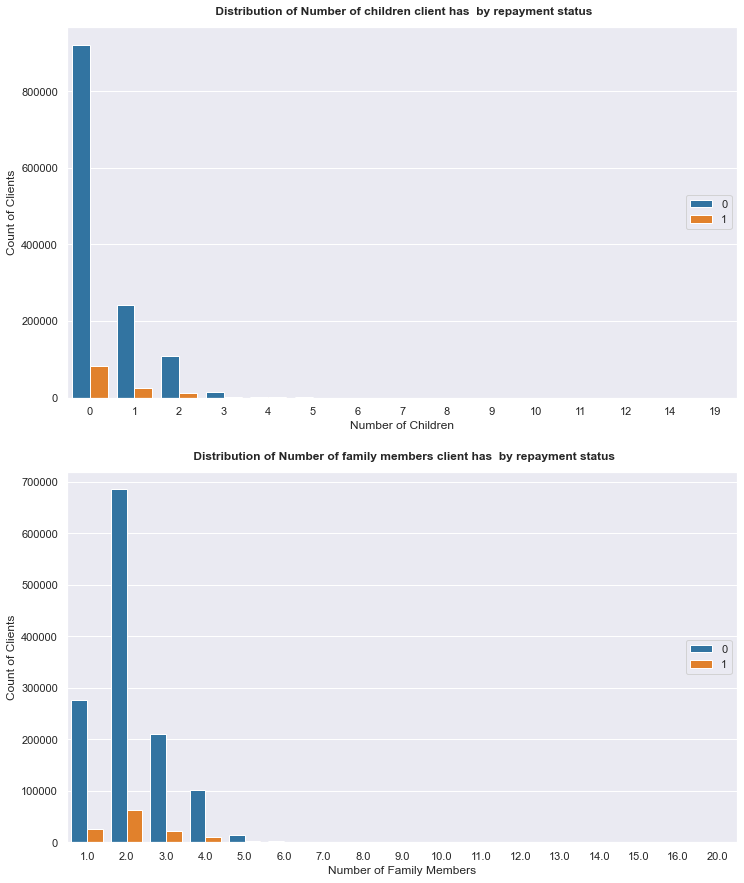

In [147]:
# CNT_CHILDREN - Number of children the client has.
# CNT_FAM_MEMBERS - How many family members does client have.

fig = plt.figure(figsize= [12, 15])

plt.subplot(2,1,1)
plt.title(" Distribution of Number of children client has  by repayment status", weight = "bold")
ax = sns.countplot(data["CNT_CHILDREN"], hue = data["TARGET"])
ax.set(xlabel = "Number of Children", ylabel = "Count of Clients")
plt.legend(loc = "right")

plt.subplot(2,1,2)
plt.title(" Distribution of Number of family members client has  by repayment status", weight = "bold")
ax = sns.countplot(data["CNT_FAM_MEMBERS"], hue = data["TARGET"])
ax.set(xlabel = "Number of Family Members", ylabel = "Count of Clients")
plt.legend(loc = "right")

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

Subplot1:
1. The majority as per both cases of repayment status, have zero children.
2. Clients with more than 2 children do not have difficulty in making payments.
3. Clients with 0 children have the majority in terms of having difficulty in making payments.

Subplot2:
1. Clients with 2 family members living together are in high numbers as per both cases of repayment status
2. Also, from point 1, the majority of clients having difficulty in payments have 2 family members

### Distribution of Suite type

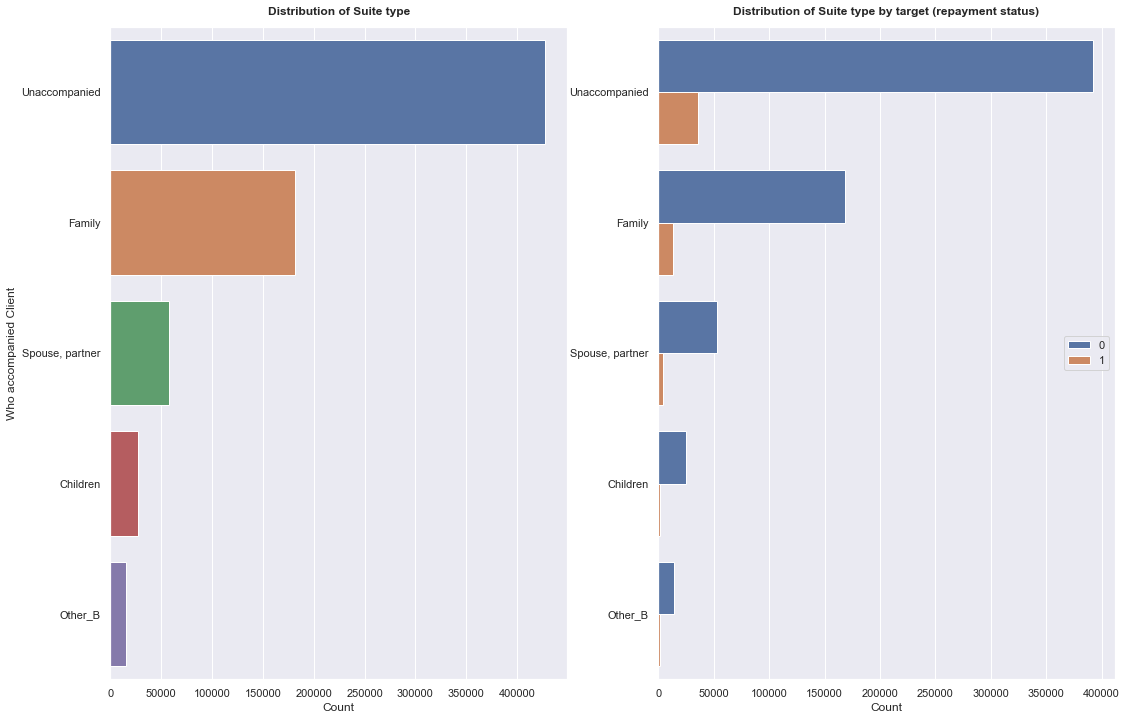

In [148]:
#NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

plt.figure(figsize = [18, 12])

plt.subplot(1,2,1)
plt.title("Distribution of Suite type", weight = "bold")
ax = sns.countplot(y = data["NAME_TYPE_SUITE_y"], palette = "deep", order = data["NAME_TYPE_SUITE_y"].value_counts().index[:5])
ax.set(xlabel = "Count", ylabel = "Who accompanied Client")

plt.subplot(1,2,2)
plt.title("Distribution of Suite type by target (repayment status)", weight = "bold")
ax = sns.countplot(y = data["NAME_TYPE_SUITE_y"], palette="deep", hue=data["TARGET"], order = data["NAME_TYPE_SUITE_y"].value_counts().index[:5])
ax.set(xlabel = "Count", ylabel = "")
plt.legend(loc = "right")

plt.show()

<h1 style = "color:Pink"> Inferences </h1>
Note: Missing data was labelled as 'missing' during the data cleaning process so we can ignore it.

1. Majority of the clients are (in both cases of repayment status) unaccompanied (without anyone to help/guide them)
2. Least amount of clients are in the company of their children.


### Distribution of client income type

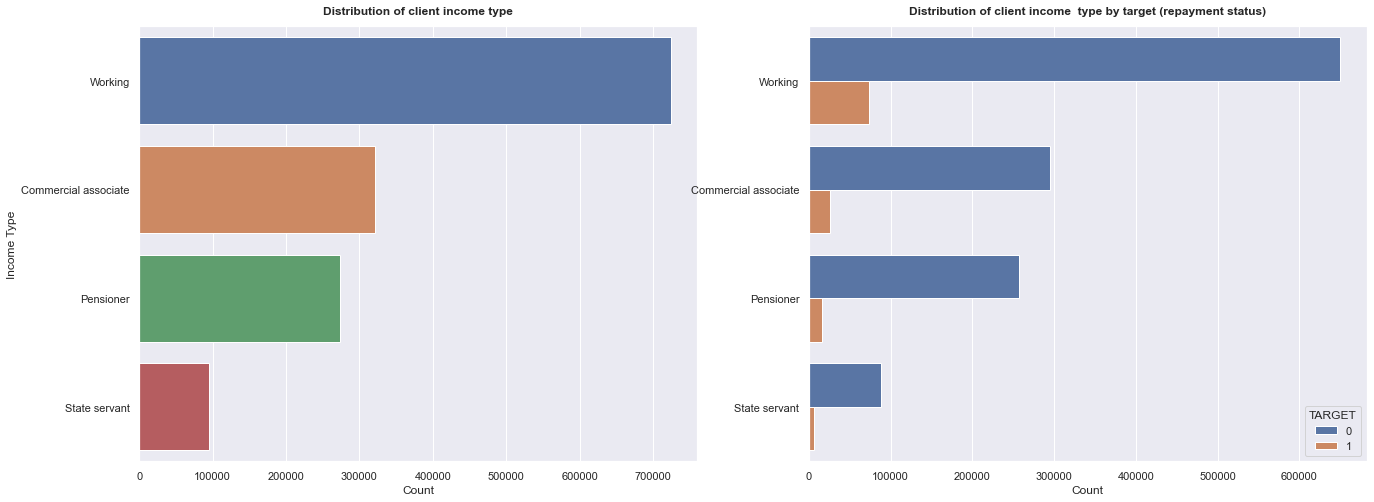

In [149]:
#NAME_INCOME_TYPE: Client's income type
plt.figure(figsize = [22, 8])

plt.subplot(1,2,1)
plt.title("Distribution of client income type",  weight = "bold")
ax = sns.countplot(y = data["NAME_INCOME_TYPE"], palette = "deep", order = data["NAME_INCOME_TYPE"].value_counts().index[:4])
ax.set(xlabel = "Count", ylabel = "Income Type")

plt.subplot(1,2,2)
plt.title("Distribution of client income  type by target (repayment status)",  weight = "bold")
ax = sns.countplot(y = data["NAME_INCOME_TYPE"],  hue = data["TARGET"], palette="deep", order = data["NAME_INCOME_TYPE"].value_counts().index[:4])
ax.set(xlabel = "Count", ylabel = "")

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

1. Most clients as per both cases of repayment status, are working.
2. Conversely, the least amount of clients are pensioners (retired clients)

### Distribution of Education type by repayment status


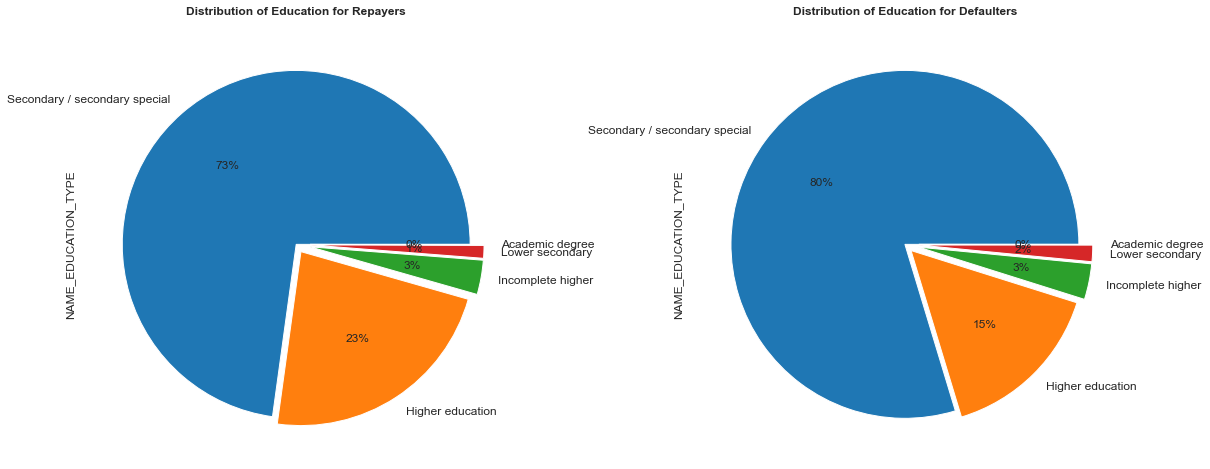

In [150]:
#NAME_EDUCATION_TYPE: Level of education the client

explode = [0, 0.05, 0.08, 0.08, 0.08]

plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
plt.title("Distribution of Education for Repayers",  weight = "bold")
data[data["TARGET"] == 0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12, autopct = "%1.0f%%", explode = explode)

plt.subplot(1,2,2)
plt.title("Distribution of Education for Defaulters",  weight = "bold")
data[data["TARGET"] == 1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12, autopct = "%1.0f%%", explode = explode)

plt.show()

### Point to infer from the graph

1. Clients who default are proportionally 9% higher compared to clients who do not default (for clients with education as secondary).
2. In the higher education category, clients who default are 8% fewer.
3. In both cases of repayment status, lower secondary and academic degree categories are the minority.

### Average Earnings by different professions based on target (repayment status)

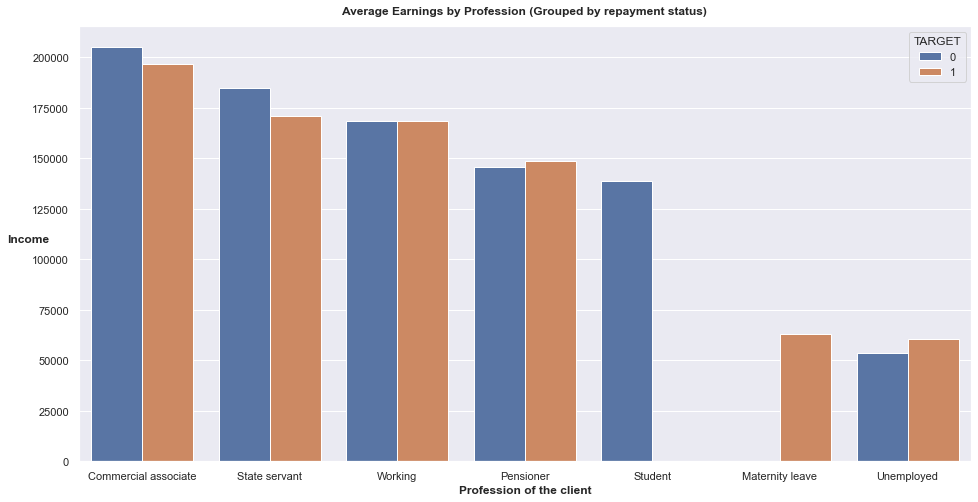

In [151]:
#creating a dataframe grouped by the desired columns
data2 = data.groupby(['TARGET','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending = False)
fig = plt.figure(figsize = [16, 8])

ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL', data = data2, hue='TARGET', palette = "deep")
plt.title("Average Earnings by Profession (Grouped by repayment status)", weight = "bold")

plt.xlabel("Profession of the client", weight = "bold")
plt.ylabel("Income", rotation = 0, weight = "bold")
plt.show()

<h1 style = "color:Pink"> Inferences </h1>
1. In both cases of repayment status, commerical associate clients are the highest earners.
2. Clients who are on maternity leave (therefore, female clients) have difficulty in making payments
3. Pensioners and students do not have any difficulties in repayments.
4. There are almost an equal number of clients under the working category who repay and default.

### Distribution of Education type by loan repayment status


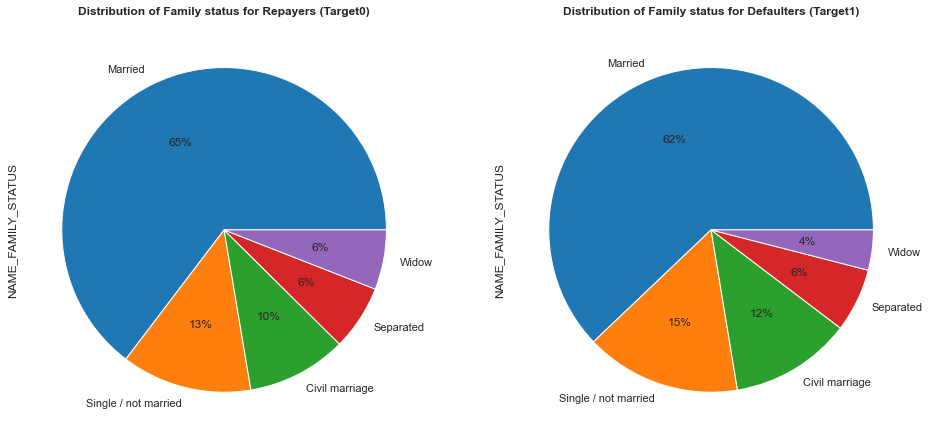

In [152]:
#NAME_FAMILY_STATUS - Family status of the client

plt.figure(figsize = [16, 8])
plt.subplot(1,2,1)
plt.title("Distribution of Family status for Repayers (Target0)",  weight = "bold")
data[data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.subplot(1,2,2)
plt.title("Distribution of Family status for Defaulters (Target1)", weight = "bold")
data[data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

1. There's a difference of -4% in married clients who have difficulty in making payments.
2. Family status for both cases of repayment status have an almost evenly distributed family status (family members living with the client)

### Distribution of credit amount and housing type

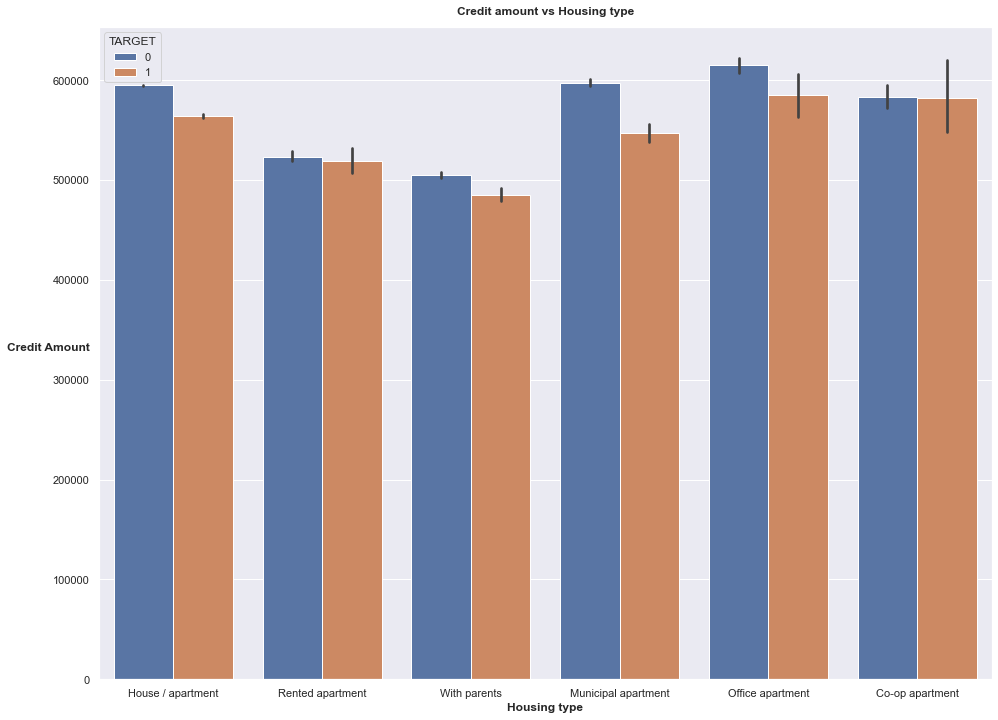

In [154]:
# Box plotting for Credit amount and Housing type (Segregated by repyament status (Target))

plt.figure(figsize = [16,12])
plt.title('Credit amount vs Housing type',  weight = "bold")

sns.barplot(data = data, x = 'NAME_HOUSING_TYPE', y = 'AMT_CREDIT_x', hue = 'TARGET', palette = "deep")
plt.xticks(rotation = 0)

plt.xlabel("Housing type", weight = "bold")
plt.ylabel("Credit Amount", weight = "bold", rotation = 0)

plt.show()

<h1 style = "color:Pink"> Inferences </h1>

1. Clients with office, co-op, municipal aparments have the highest repayers.
2. Clients living with parents or in a parents' aparment have the least amount of repayers and defaulters.

### Distribution of Loan purpose (Segregated by repyament status (Target))

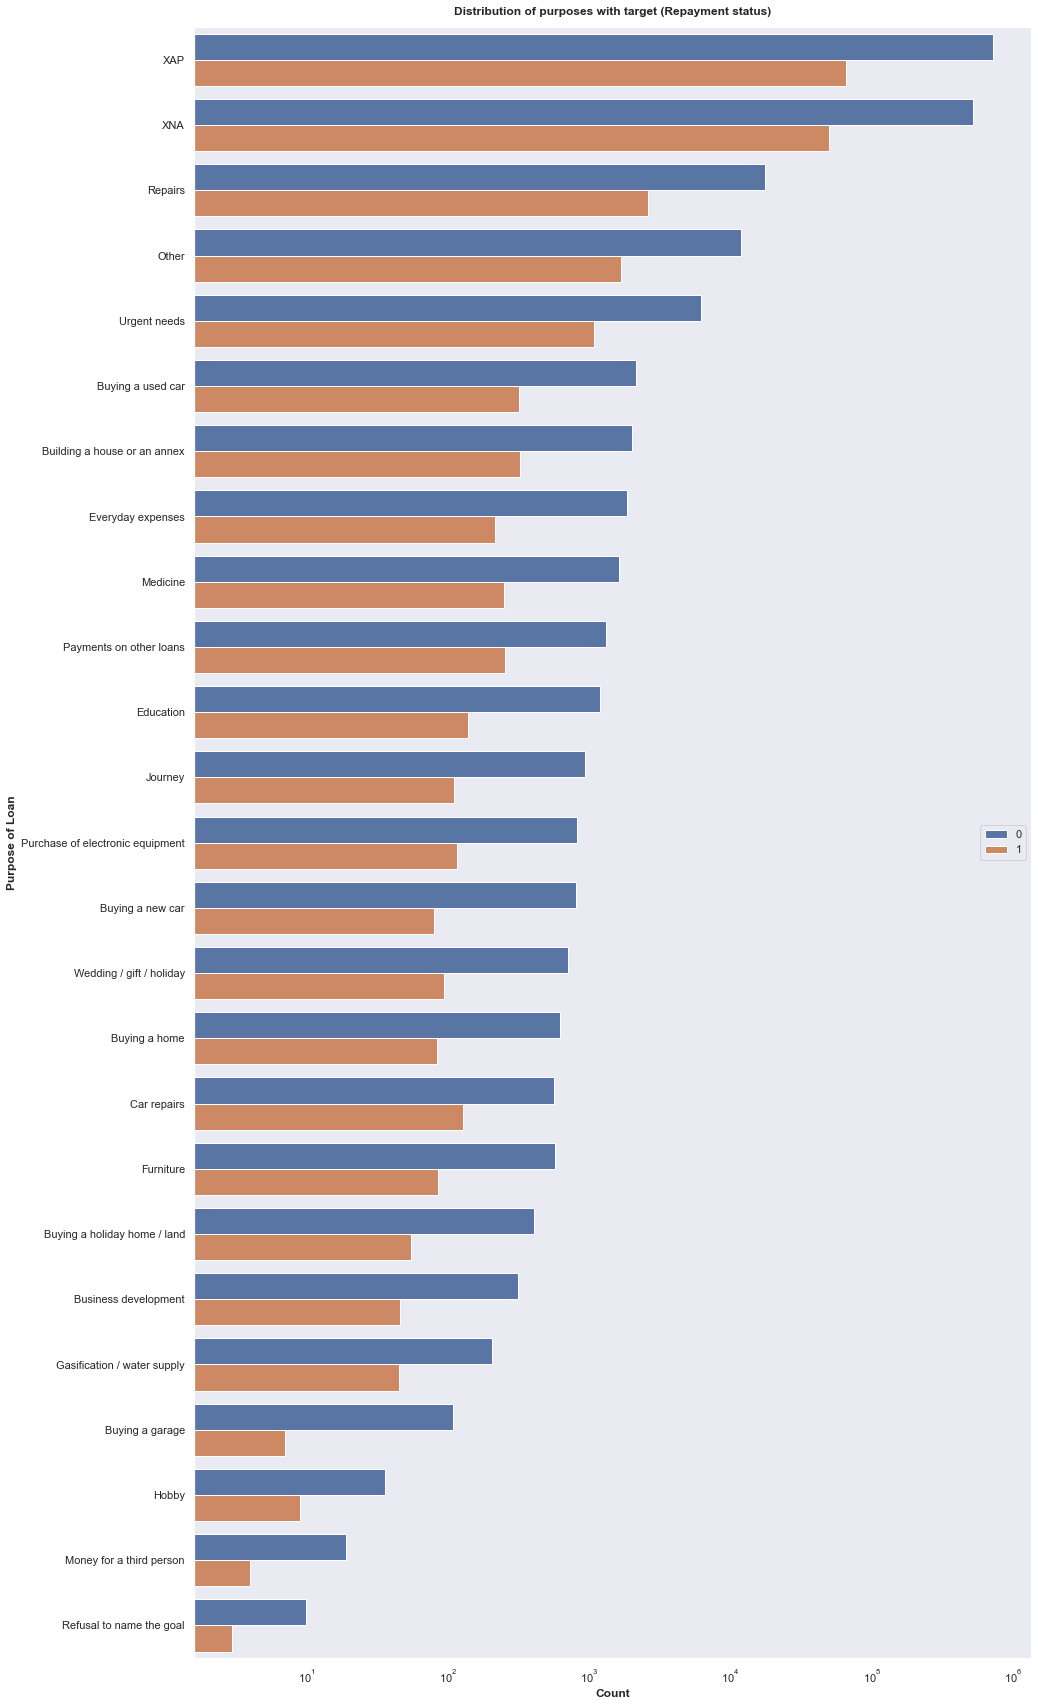

In [155]:
#Using log scale for distribution
sns.set_style('dark')
sns.set_context('notebook')

plt.figure(figsize = [15, 30])
plt.xscale('log')
plt.title('Distribution of purposes with target (Repayment status)',  weight = "bold")

ax = sns.countplot(data = data, y = 'NAME_CASH_LOAN_PURPOSE', order = data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'TARGET', palette = 'deep') 
plt.ylabel("Purpose of Loan", weight = "bold")
plt.xlabel("Count", weight = "bold")

plt.legend(loc = "right")
plt.show()

<h1 style = "color:Pink"> Inferences </h1>

1. Repair purposes are on top with most defaulters and repayers.
2. Proportion wise, there are high amount of repayers when the client refuses to name the purpose of the loan. Although such clients are rare.

### Distribution of contract status

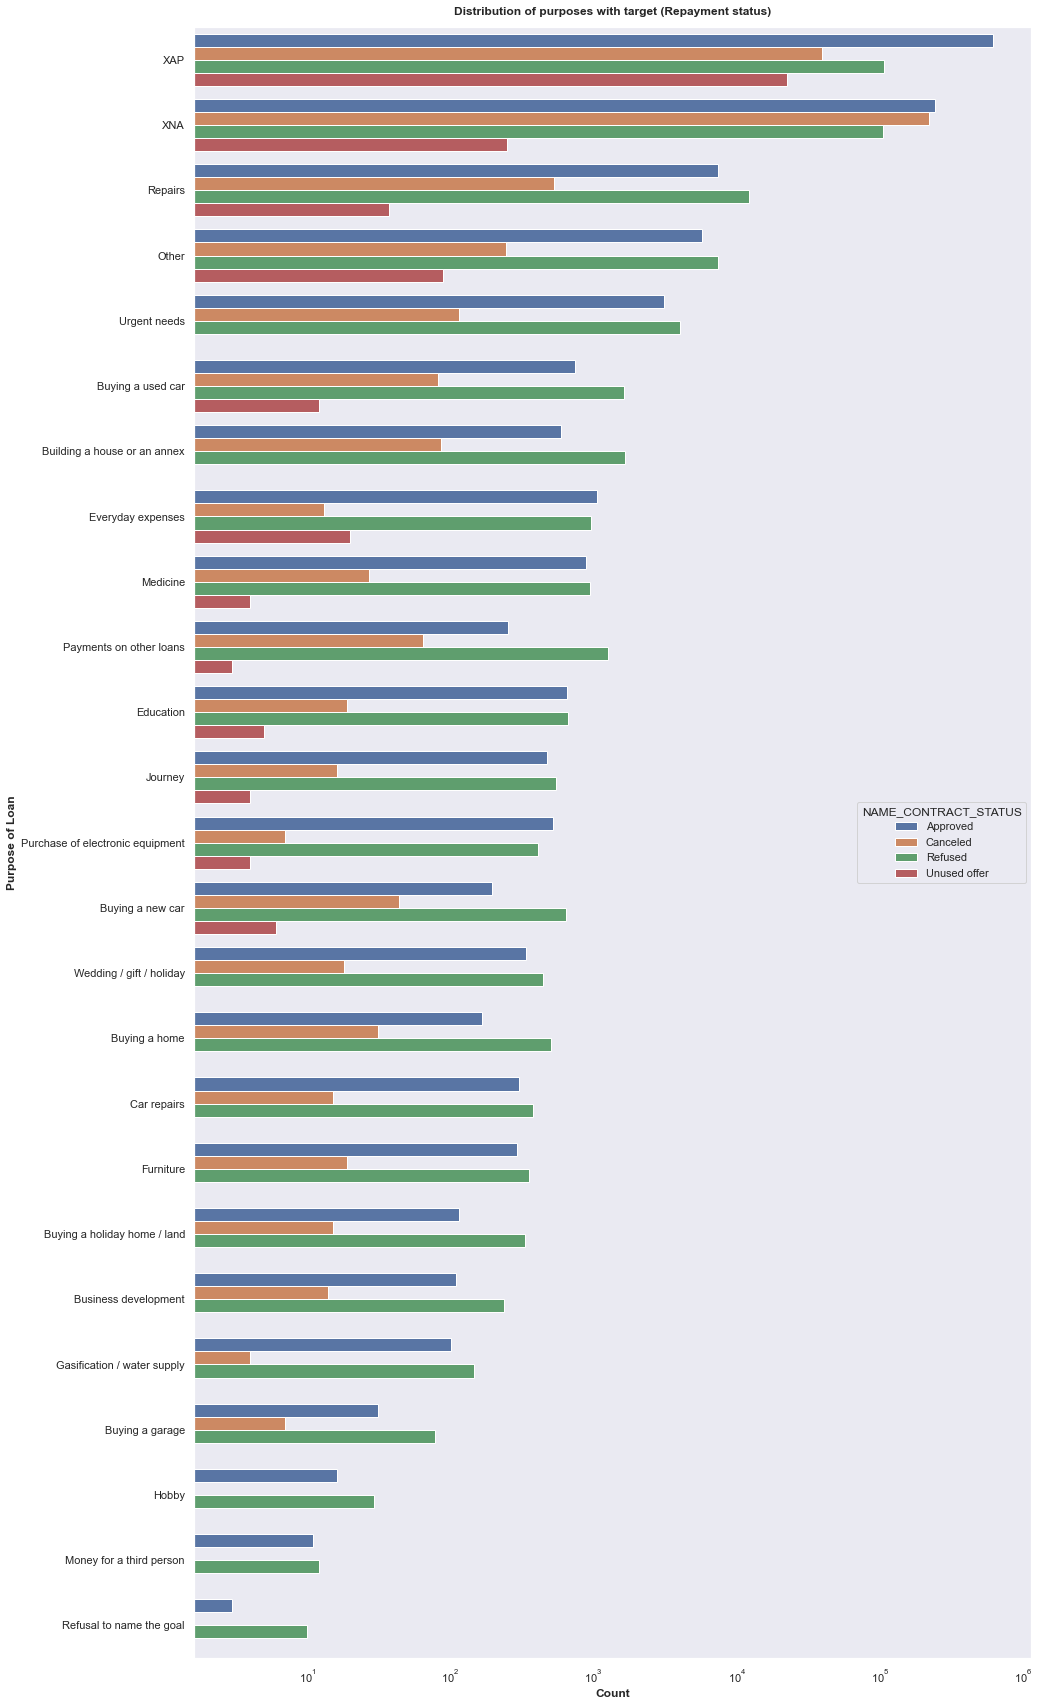

In [156]:
#Using log scale for distribution
sns.set_style('dark')
sns.set_context('notebook')

plt.figure(figsize = [15, 30])
plt.xscale('log')
plt.title('Distribution of purposes with target (Repayment status)',  weight = "bold")

ax = sns.countplot(data = data, y = 'NAME_CASH_LOAN_PURPOSE', order = data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS', palette = 'deep') 
plt.ylabel("Purpose of Loan", weight = "bold")
plt.xlabel("Count", weight = "bold")

plt.show()

<h1 style = "color:Pink"> Inferences </h1>
1. Most rejection of loans is when the purpose of the client is based on Repairs.
2. For education purposes we have equal number of approvals and refusals.

# TOP10 Correlation variables

In [157]:
repayerData = data[data['TARGET'] == 0]
defaulterData = data[data['TARGET'] == 1]

In [158]:
#to find the most correlated columns (positive and negative)
repayerData.corr().unstack().sort_values(ascending = False).drop_duplicates()

SK_ID_CURR                 SK_ID_CURR                  1.000000
AMT_APPLICATION            AMT_GOODS_PRICE_y           0.999888
YEARS_BUILD_MEDI           YEARS_BUILD_AVG             0.998603
OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE    0.998578
FLOORSMIN_AVG              FLOORSMIN_MEDI              0.997259
                                                         ...   
FLAG_EMP_PHONE             FLAG_DOCUMENT_6            -0.572239
DAYS_BIRTH                 FLAG_EMP_PHONE             -0.631476
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         -0.801063
DAYS_EMPLOYED              FLAG_EMP_PHONE             -0.999774
SK_ID_CURR                 TARGET                           NaN
Length: 7611, dtype: float64

## From the above output, the top10 correlated columns are: (double click to view in proper format)

1. OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE        1.00
2. AMT_CREDIT_y                AMT_APPLICATION                 0.97
3. DAYS_TERMINATION            DAYS_LAST_DUE                   0.93
4. CNT_FAM_MEMBERS             CNT_CHILDREN                    0.90
5. REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION     0.88
6. DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE        0.87
7. AMT_GOODS_PRICE_y           AMT_CREDIT_y                    0.86
8. AMT_APPLICATION             AMT_GOODS_PRICE_y               0.85
9. REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY         0.83
10. AMT_CREDIT_y                AMT_ANNUITY_y                  0.81

In [160]:
#making a dataframe with only the columns with high correlation
top10_CorrTarget0 = repayerData[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "AMT_APPLICATION", "DAYS_TERMINATION", "DAYS_LAST_DUE", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_GOODS_PRICE_y", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "AMT_CREDIT_y", "AMT_ANNUITY_y"]].copy()

In [161]:
top10_CorrTarget0.shape

(1291341, 16)

# Visually showcasing the top10 correlated columns through a heatmap

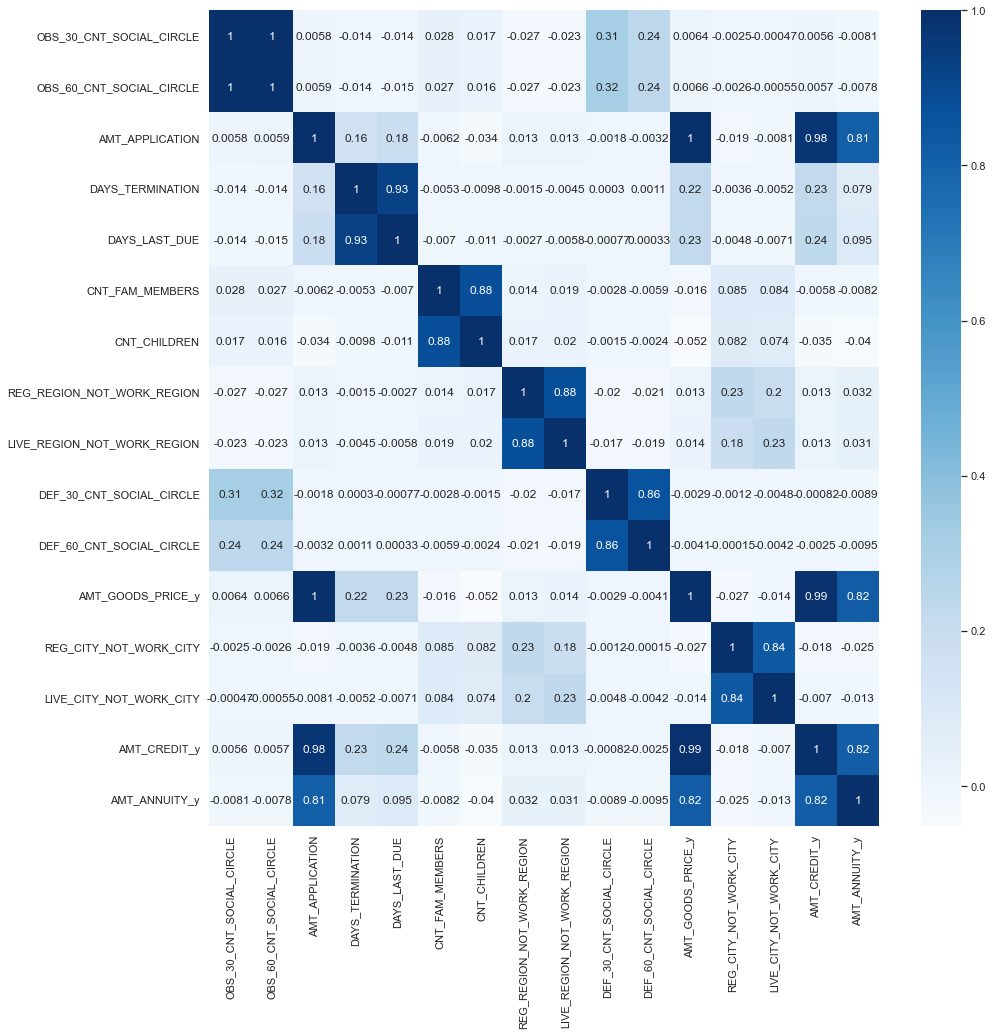

In [162]:
#Visually showcasing the top10 correlated columns through a heatmap

corr_target0 = top10_CorrTarget0.corr()

plt.figure(figsize = [15, 15])
sns.heatmap(data = corr_target0, cmap="Blues", annot=True)

plt.show()

<h1 style = "color:Pink"> Inferences </h1>
1. AMT_GOODS_PRICE and AMT_APPLICATION have a high correlation, which means the more credit the client asked for previously is proportional to the goods price that the client asked for previously.
2. AMT_ANNUITY and AMT_APPLICATION also have a high correlation, which means the higher the loan annuity issued, the higher the goods price that the client asked for previously.
3. If the client's contact address does not match the work address, then there's a high chance that the client's permanent address also does not match the work address.
4. First due of the previous application is highly correlated with Relative to the expected termination of the previous application
5. CNT_CHILDREN and CNT_FAM_MEMBERS are highly correlated which means a client with children is higly likely to have family members as well.

In [163]:
defaulterData.corr().unstack().sort_values(ascending = False).drop_duplicates()

SK_ID_CURR                 SK_ID_CURR                  1.000000
AMT_GOODS_PRICE_y          AMT_APPLICATION             0.999676
YEARS_BUILD_MEDI           YEARS_BUILD_AVG             0.998448
OBS_60_CNT_SOCIAL_CIRCLE   OBS_30_CNT_SOCIAL_CIRCLE    0.998378
BASEMENTAREA_AVG           BASEMENTAREA_MEDI           0.998322
                                                         ...   
FLAG_EMP_PHONE             DAYS_BIRTH                 -0.583578
                           FLAG_DOCUMENT_6            -0.588228
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         -0.886465
DAYS_EMPLOYED              FLAG_EMP_PHONE             -0.999788
SK_ID_CURR                 TARGET                           NaN
Length: 7104, dtype: float64

# From the above output, the top10 correlated columns are: (double click to view in proper format)

1. OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       1.00
2. AMT_APPLICATION              AMT_CREDIT_y                   0.97
3. DAYS_TERMINATION             DAYS_LAST_DUE                  0.95
4. CNT_FAM_MEMBERS              CNT_CHILDREN                   0.90
5. LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.87
6. DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.86
7. AMT_CREDIT_y                 AMT_ANNUITY_y                  0.83
8. LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
9. AMT_ANNUITY_y                AMT_GOODS_PRICE_y              0.76
10. AMT_ANNUITY_x                AMT_CREDIT_x                  0.74

In [164]:
#Adding the top10 correlated columns into a new dataframe:
top10_CorrTarget1 = data[["OBS_60_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "AMT_APPLICATION", "AMT_CREDIT_y", "DAYS_TERMINATION", "DAYS_LAST_DUE", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "LIVE_REGION_NOT_WORK_REGION", "REG_REGION_NOT_WORK_REGION", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_ANNUITY_y", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_WORK_CITY", "AMT_GOODS_PRICE_y", "AMT_ANNUITY_x", "AMT_CREDIT_x"]].copy()

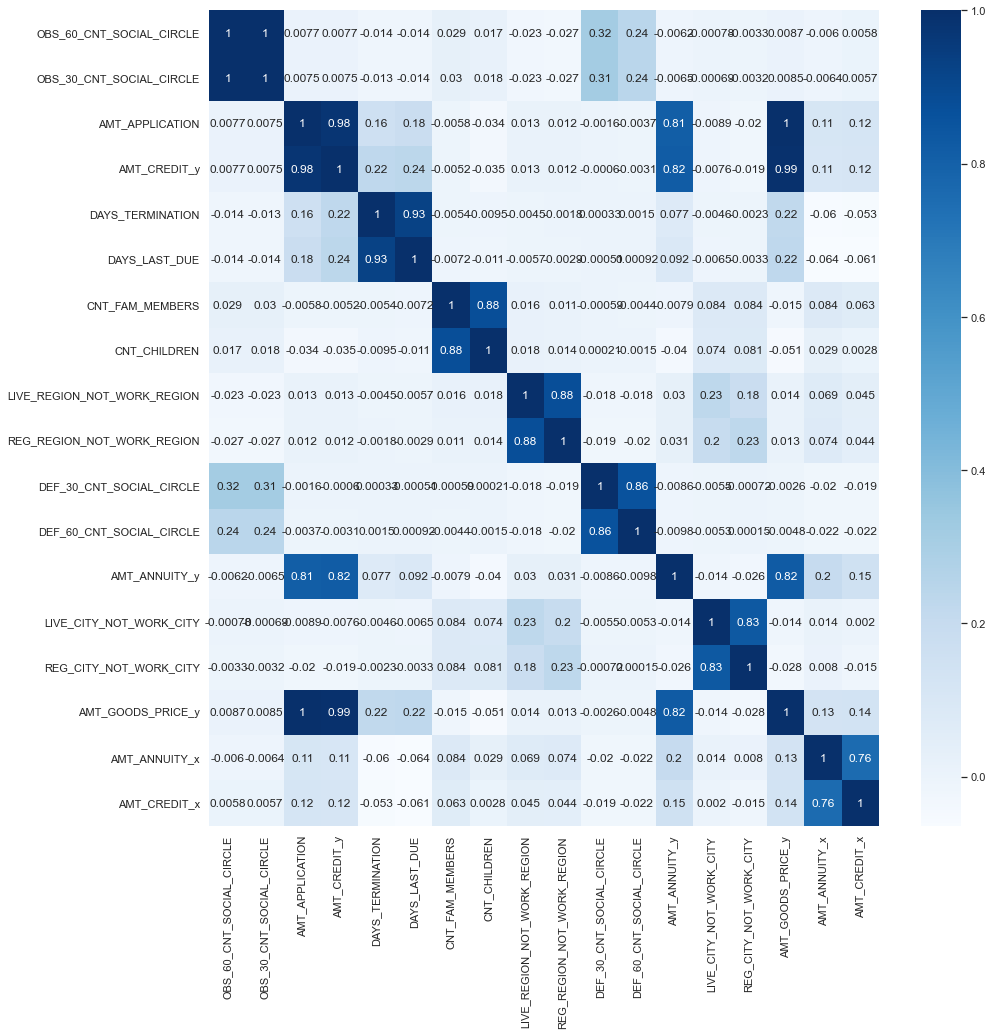

In [165]:
corr_target1 = top10_CorrTarget1.corr()

plt.figure(figsize = [15, 15])
sns.heatmap(data = corr_target1, cmap="Blues", annot=True)
plt.show()

<h2 style = "color:Pink"> Inferences</h2>
1. In comparison to the repayer heatmap, AMT_GOODS_PRICE and AMT_APPLICATION have a high correlation here as well, which means the more credit the client asked for previously is proportional to the goods price that the client asked for previously.
2. In comparison to the repayer heatmap, AMT_ANNUITY and AMT_APPLICATION also have a high correlation, which means the higher the loan annuity issued, the higher the goods price that the client asked for previously.
3. In comparison to the repayer heatmap, If the client's contact address does not match the work address, then there's a high chance that the client's permanent address also does not match the work address.
4. Higher the goods price, higher the credit by the client
5. First due of the previous application is highly correlated with Relative to the expected termination of the previous application (same as with the repayer heatmap)
6. CNT_CHILDREN and CNT_FAM_MEMBERS are highly correlated which means a client with children is higly likely to have family members as well (same as with the repayer heatmap)

<h2 style = "color:Pink"> Conclusion from the Analysis </h2>
 
Banks must target more on contract type ‘Student’ ,’Pensioner’ and ‘Businessman’ for profitable business

Banks must focus less on income type ‘Working’ as it is has most number of unsuccessful payments in oreder to get rid of financial loss for the organization
#### 1. Clients who are Students, Pensioners and Commercial Associates with a housing type such as office/co-op/municipal apartments NEED TO BE TARGETED by the bank for successful repayments. These clients have the highest amount of repayment history.

#### 2. Female clients on maternity leave should NOT be targeted as they have no record of repayments (therefore they are highly likely to default and targeting them would lead to a loss)

#### 3. While clients living with parents have the least amount of repayers, they also have the least amount of defaulters. So, in cases where the risk is less, such clients can be TARGETED.

#### 4. Clients who are working need to be targeted LESS by the bank as they have the highest amount of defaulters.

#### 5. Clients should NOT be targeted based on their education type alone as the data is very inconclusive.

#### 6. Banks SHOULD target clients who own a car. 

#### 7. There are NO repayers/negligible repayers when the contract type is of revolving loan.

#### 8. Banks SHOULD target more people with no children. 

#### 9. 'Repairs' purpose of loan is the one with the most defaulters and repayers.  Therefore, clients with very low risk SHOULD be given loans for such purpose to yield high profits.

#### 10. Banks SHOULD also target female clients as they are the highest repayers (almost as double as males) amongst both the genders.